# Исследование рынка компьютерных игр

Исследование рынка компьютерных игр на основе данных интернет-магазина "Стримчик". Нужно выявить определяющие успешность игры закономерности. В наборе данных присутствуют сведения о названиях игр и их годах выпуска, информация о платформах, на которых выходили игры, отзывы пользователей и критиков, и о рейтингах этих игр. 

**Цель работы:**

Определить закономерности, влияющие на успешность игры

**План работы**

1. Открыть файл
2. Подготовка данных
3. Исследовательский анализ данных
4. Составить портрет пользователя каждого региона
5. Проверка гипотез
6. Вывод

Описание данных

Name — название игры

Platform — платформа

Year_of_Release — год выпуска

Genre — жанр игры

NA_sales — продажи в Северной Америке (миллионы проданных копий)

EU_sales — продажи в Европе (миллионы проданных копий)

JP_sales — продажи в Японии (миллионы проданных копий)

Other_sales — продажи в других странах (миллионы проданных копий)

Critic_Score — оценка критиков (максимум 100)

User_Score — оценка пользователей (максимум 10)

Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

## Шаг 1 Открыть и изучить проект

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st
import numpy as np

In [2]:
df = pd.read_csv('https://code.s3.yandex.net/datasets/games.csv')

In [3]:
df.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [4]:
def first_view(df):
    display('Info')
    df.info()
    display('*'*50)
    display('Value counts')
    display(df.value_counts())
    display('*'*50)
    display('Describe')
    display(df.describe())
    display('*'*50)
    display('NAN?')
    display(df.isna().sum())

In [5]:
first_view(df)

'Info'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


'**************************************************'

'Value counts'

Name                          Platform  Year_of_Release  Genre         NA_sales  EU_sales  JP_sales  Other_sales  Critic_Score  User_Score  Rating
 Tales of Xillia 2            PS3       2012.0           Role-Playing  0.20      0.12      0.45      0.07         71.0          7.9         T         1
Red Dead Revolver             PS2       2004.0           Shooter       0.71      0.55      0.00      0.19         73.0          7.8         M         1
Red Dead Redemption           PS3       2010.0           Action        2.79      2.53      0.17      0.99         95.0          8.8         M         1
Red Bull BC One               DS        2008.0           Misc          0.08      0.00      0.00      0.01         48.0          5.3         E         1
Record of Agarest War 2       PS3       2010.0           Role-Playing  0.09      0.00      0.04      0.01         56.0          7.2         T         1
                                                                                             

'**************************************************'

'Describe'

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


'**************************************************'

'NAN?'

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64

In [6]:
df.duplicated().sum()

0

Видим, что в датафрейме достаточно много данных (16715 строк). При этом в некоторых столбцах присутсвует достаточно большое количество пропусков. На данном этапе дубликатов не обнаружено, что уже неплохо

## Подготовка данных

In [7]:
# привожу названия столбцов к нижнему регистру 

df.columns = df.columns.str.lower()

In [8]:
# проверяю пропуски по годам

df[df['year_of_release'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16373,PDC World Championship Darts 2008,PSP,NaN,Sports,0.01,0.00,0.00,0.00,43.0,tbd,E10+
16405,Freaky Flyers,GC,NaN,Racing,0.01,0.00,0.00,0.00,69.0,6.5,T
16448,Inversion,PC,NaN,Shooter,0.01,0.00,0.00,0.00,59.0,6.7,M
16458,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [9]:
# сортирую пропуски по годам по платформе, чтобы понять, где именно они найдены

df[df['year_of_release'].isna()]['platform'].value_counts()

PS2     34
Wii     34
X360    30
DS      30
PS3     25
XB      21
2600    17
PC      17
PSP     16
GC      14
GBA     11
3DS      8
PS       7
N64      3
GB       1
PSV      1
Name: platform, dtype: int64

In [10]:
df = df.dropna(subset = ['year_of_release'])


Удаляем пропуски из столбца с годом т.к. их довольно мало

In [11]:
df.reset_index(drop=True, inplace = True)

In [12]:
# проверяю наличие пропусков после заполнения 

df['year_of_release'].isna().sum()

0

In [13]:
# меняю формат времени с float на целое число int

df['year_of_release'] = df['year_of_release'].astype(int)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16446 entries, 0 to 16445
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16446 non-null  object 
 2   year_of_release  16446 non-null  int32  
 3   genre            16444 non-null  object 
 4   na_sales         16446 non-null  float64
 5   eu_sales         16446 non-null  float64
 6   jp_sales         16446 non-null  float64
 7   other_sales      16446 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       9839 non-null   object 
 10  rating           9768 non-null   object 
dtypes: float64(5), int32(1), object(5)
memory usage: 1.3+ MB


In [15]:
# фильтруем таблицу по значению tbd, чтобы посмотреть, как много этого tbd встретится. обнаружили 2424 строки

df[df['user_score'] == 'tbd']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
119,Zumba Fitness,Wii,2010,Sports,3.45,2.59,0.0,0.66,NaN,tbd,E
300,Namco Museum: 50th Anniversary,PS2,2005,Misc,2.08,1.35,0.0,0.54,61.0,tbd,E10+
516,Zumba Fitness 2,Wii,2011,Sports,1.51,1.03,0.0,0.27,NaN,tbd,T
639,uDraw Studio,Wii,2010,Misc,1.65,0.57,0.0,0.20,71.0,tbd,E
710,Just Dance Kids,Wii,2010,Misc,1.52,0.54,0.0,0.18,NaN,tbd,E
...,...,...,...,...,...,...,...,...,...,...,...
16426,Planet Monsters,GBA,2001,Action,0.01,0.00,0.0,0.00,67.0,tbd,E
16428,Bust-A-Move 3000,GC,2003,Puzzle,0.01,0.00,0.0,0.00,53.0,tbd,E
16429,Mega Brain Boost,DS,2008,Puzzle,0.01,0.00,0.0,0.00,48.0,tbd,E
16435,Plushees,DS,2008,Simulation,0.01,0.00,0.0,0.00,NaN,tbd,E


In [16]:
# фильтруем таблицу по значению tbd и сортируем по рейтингу от критиков.

df[df['user_score'] == 'tbd'].sort_values(by = 'critic_score', ascending = True)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
16056,Thunder Alley,GBA,2004,Racing,0.01,0.00,0.0,0.00,23.0,tbd,E
8642,Bigfoot: Collision Course,DS,2009,Racing,0.14,0.00,0.0,0.01,26.0,tbd,E
14517,The Island of Dr. Frankenstein,Wii,2009,Adventure,0.03,0.00,0.0,0.00,26.0,tbd,E
5722,Calvin Tucker's Redneck Jamboree,Wii,2008,Misc,0.28,0.00,0.0,0.02,26.0,tbd,E10+
12527,Animorphs: Shattered Reality,PS,2000,Action,0.03,0.02,0.0,0.00,27.0,tbd,E
...,...,...,...,...,...,...,...,...,...,...,...
16386,Summer Athletics,PC,2008,Sports,0.00,0.01,0.0,0.00,NaN,tbd,NaN
16403,Metal Gear Solid V: The Definitive Experience,XOne,2016,Action,0.01,0.00,0.0,0.00,NaN,tbd,M
16419,Outdoors Unleashed: Africa 3D,3DS,2011,Sports,0.01,0.00,0.0,0.00,NaN,tbd,T
16435,Plushees,DS,2008,Simulation,0.01,0.00,0.0,0.00,NaN,tbd,E


In [17]:
df['user_score'] = df['user_score'].replace('tbd', np.nan)
df['user_score'].isna().sum()

8983

In [18]:
# меняю формат с object на float 

df['user_score'] = df['user_score'].astype(float)

In [19]:
# проверяю форматы ещё раз
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16446 entries, 0 to 16445
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16446 non-null  object 
 2   year_of_release  16446 non-null  int32  
 3   genre            16444 non-null  object 
 4   na_sales         16446 non-null  float64
 5   eu_sales         16446 non-null  float64
 6   jp_sales         16446 non-null  float64
 7   other_sales      16446 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           9768 non-null   object 
dtypes: float64(6), int32(1), object(4)
memory usage: 1.3+ MB


In [20]:
df.isna().sum()

name                  2
platform              0
year_of_release       0
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8463
user_score         8983
rating             6678
dtype: int64

In [21]:
df[df['rating'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16441,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16442,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16443,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16444,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


На этом с заменой пропусков нужно закончить т.к. они остались только в колонках с отзывами критиков и пользователей.Если у игры нет оценки, значит её не оценили или произошла какая-то программная ошибка или что-угодно ещё. Сочинять рейтинг мы не можем, поэтому заполнять чем-то тоже считаю нецелесообразным. В случае с tbd, как мне кажется, это оправдано, но не в случае с пропусками

Пропуски в колонке рейтинга заполнить также нечем. Если у игры нет рейтинга, то мы не можем решать сами, какой рейтинг присудить. Во всяком случае это слишком трудоёмкая работа, если искать рейтинг самостоятельно для 6766 строк. 

In [22]:
df[df['name'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
652,NaN,GEN,1993,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14022,NaN,GEN,1993,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


In [23]:
df.dropna(subset = ['name'], inplace = True)

In [24]:
df.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8461
user_score         8981
rating             6676
dtype: int64

Найдены 2 пропуска в названии игры и жанре. Оказывается, это одни и те же строки. Эти строки лучше совсем удалить т.к. для дальнейших исследований они полезной информации не содержат, а потеря 2х строк из 16715 не так страшна.

In [25]:
df.duplicated().sum()

0

In [26]:
# проверяем неявные дубликаты по названию, платфоре и году выпуска игры

df[df[['name', 'platform', 'year_of_release']].duplicated(keep=False)]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
600,Madden NFL 13,PS3,2012,Sports,2.11,0.22,0.0,0.23,83.0,5.5,E
15971,Madden NFL 13,PS3,2012,Sports,0.00,0.01,0.0,0.00,83.0,5.5,E


In [27]:
df.drop(index = 15971, inplace = True)
df.reset_index(drop=True, inplace = True)

In [28]:
# создаю столбец с суммарными продажами

df['total_sales'] = df[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum(axis=1)

В процессе предобработки данных названия столбцов были приведены к нижнему регистру, заменены пропуски в столбце years_of_release и изменён формат данных в этом столбце, также значение tbd в столбце user_score заменено на пропуски и изменён формат столбца. Удалены 2 строки с пропусками данных по названию игры и жанру, проведён поиск дубликатов и создан столбец с суммарными продажами игр по всему миру. 

## Исследовательский анализ данных

[x] Сколько игр выпускалось в разные годы. Важны ли данные за все периоды?

[x] Как менялись продажи по платформам. Выбрать платформы с наибольшими суммарными продажами и постройте распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?

[X] Подобрать соответствующий актуальный период. 

[x] Построить график «ящик с усами» по глобальным продажам игр в разбивке по платформам.

[x] Посмотреть, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Построить диаграмму 
рассеяния и посчитать корреляцию между отзывами и продажами. Сформулировать выводы.

[x] Соотнести выводы с продажами игр на других платформах.

[x] Посмотреть на общее распределение игр по жанрам. 

### Сколько игр выпускалось в разные года

In [29]:
# группирую названия игр по году выхода, чтобы оценить сколько их выходило в разные года

df.groupby('year_of_release')['name'].count().sort_values(ascending = False)

year_of_release
2008    1427
2009    1426
2010    1255
2007    1197
2011    1136
2006    1006
2005     939
2002     829
2003     775
2004     762
2012     652
2015     606
2014     581
2013     544
2016     502
2001     482
1998     379
2000     350
1999     338
1997     289
1996     263
1995     219
1994     121
1993      60
1981      46
1992      43
1991      41
1982      36
1986      21
1989      17
1983      17
1990      16
1987      16
1988      15
1985      14
1984      14
1980       9
Name: name, dtype: int64

самым уржайным на игры оказались 2008 и 2009

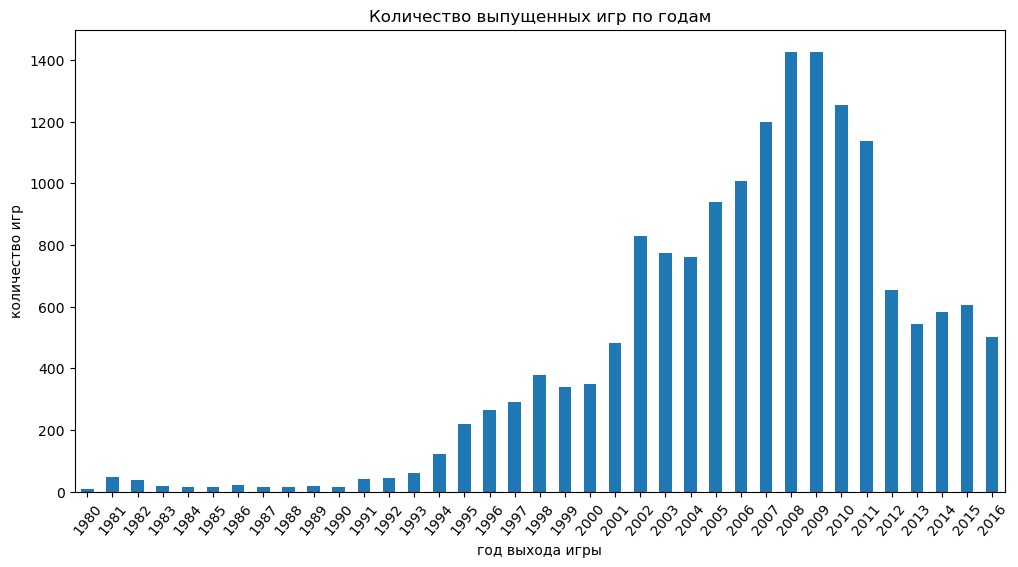

In [30]:

df.groupby('year_of_release')['name'].count().plot(kind = 'bar', figsize = (12,6))

plt.xticks(rotation = 50)
plt.title('Количество выпущенных игр по годам')
plt.xlabel('год выхода игры')
plt.ylabel('количество игр')
plt.show()

Игры, вышедшие до 1994 года можно не учитывать по причине слишком малого их количества.

### Изменение продаж по платформам

In [31]:
# группирую, чтобы понять, какие платформы показали наибольшие суммарные продажи. делаю топ 10

df.groupby('platform')['total_sales'].sum().sort_values(ascending = False).head(10)

platform
PS2     1233.56
X360     961.24
PS3      931.33
Wii      891.18
DS       802.78
PS       727.58
PS4      314.14
GBA      312.88
PSP      289.53
3DS      257.81
Name: total_sales, dtype: float64

самые прибыльные платформы: PS2, X360, PS3, Wii, DS, PS

In [32]:
pl = ["PS2", "X360", "PS3", "Wii", "DS", "PS"]

for g in pl:
    print (g)
    print(df.query('platform == @g').groupby('year_of_release')['total_sales'].sum())
    print(' ')
    

PS2
year_of_release
2000     39.17
2001    166.43
2002    205.38
2003    184.31
2004    211.81
2005    160.66
2006    103.42
2007     75.99
2008     53.90
2009     26.40
2010      5.64
2011      0.45
Name: total_sales, dtype: float64
 
X360
year_of_release
2005      8.25
2006     51.62
2007     95.41
2008    135.26
2009    120.29
2010    170.03
2011    143.84
2012     99.74
2013     88.58
2014     34.74
2015     11.96
2016      1.52
Name: total_sales, dtype: float64
 
PS3
year_of_release
2006     20.96
2007     73.19
2008    118.52
2009    130.93
2010    142.17
2011    156.78
2012    107.35
2013    113.25
2014     47.76
2015     16.82
2016      3.60
Name: total_sales, dtype: float64
 
Wii
year_of_release
2006    137.15
2007    152.77
2008    171.32
2009    206.97
2010    127.95
2011     59.65
2012     21.71
2013      8.59
2014      3.75
2015      1.14
2016      0.18
Name: total_sales, dtype: float64
 
DS
year_of_release
1985      0.02
2004     17.27
2005    130.14
2006    119.81
2007  

Далее строю распределение по годам 

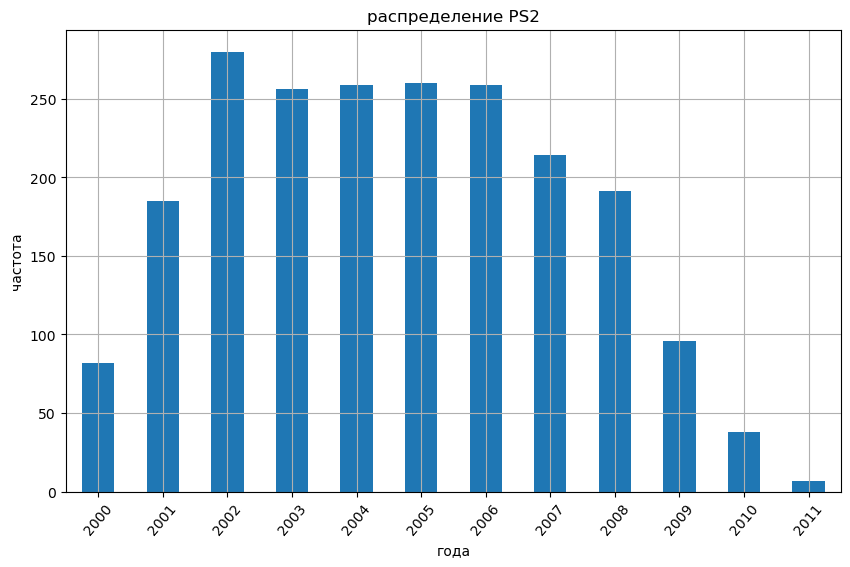

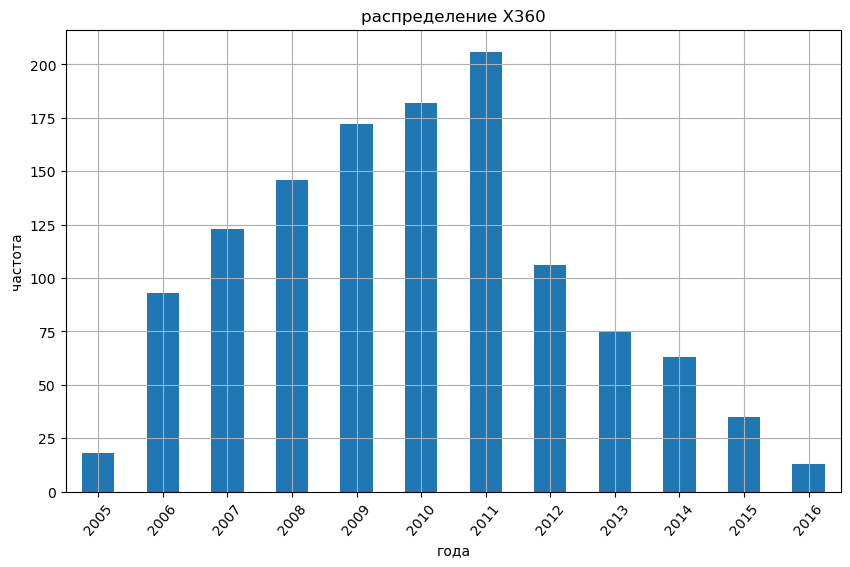

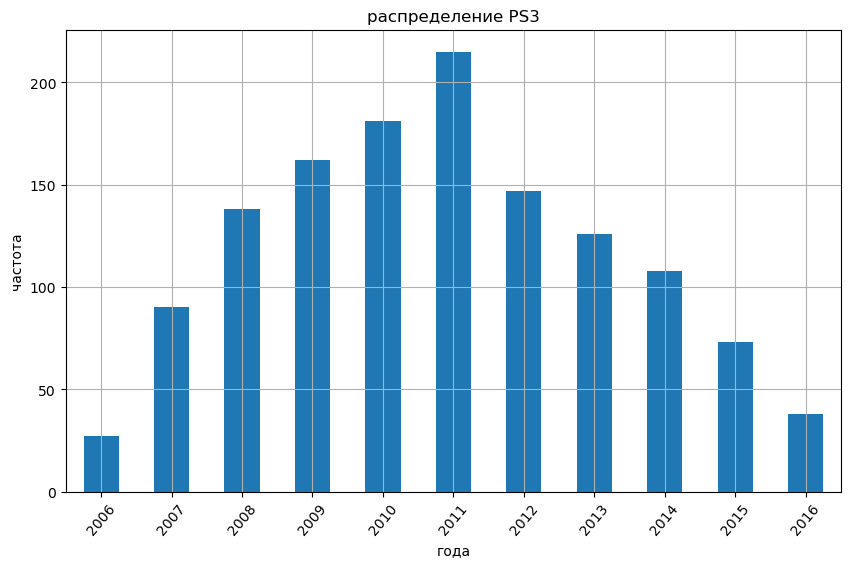

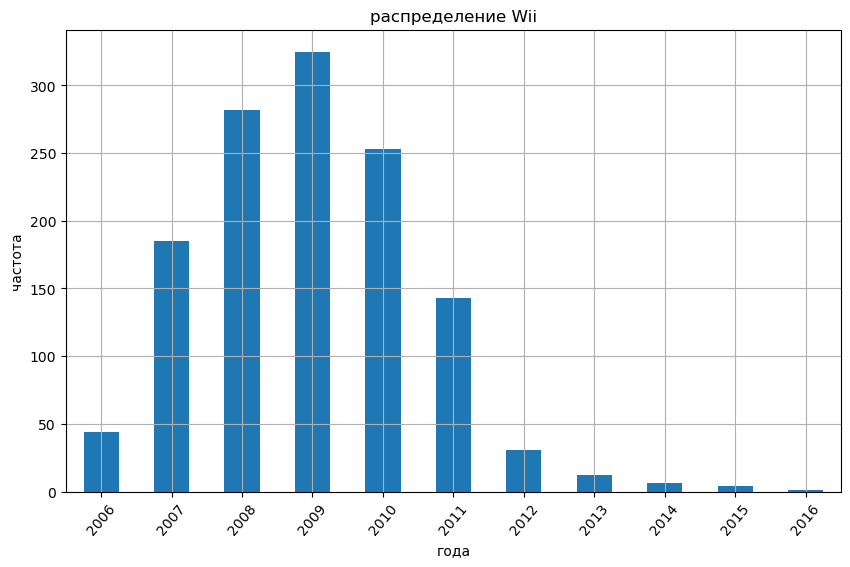

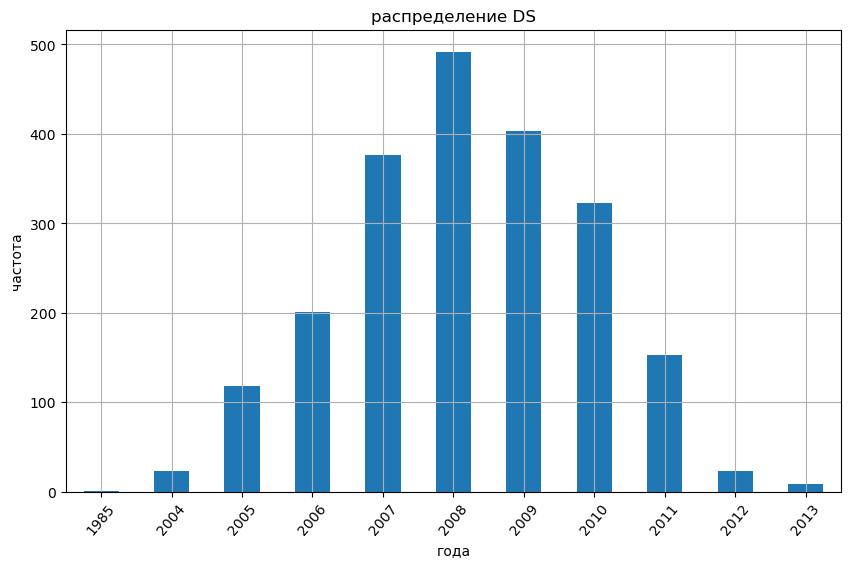

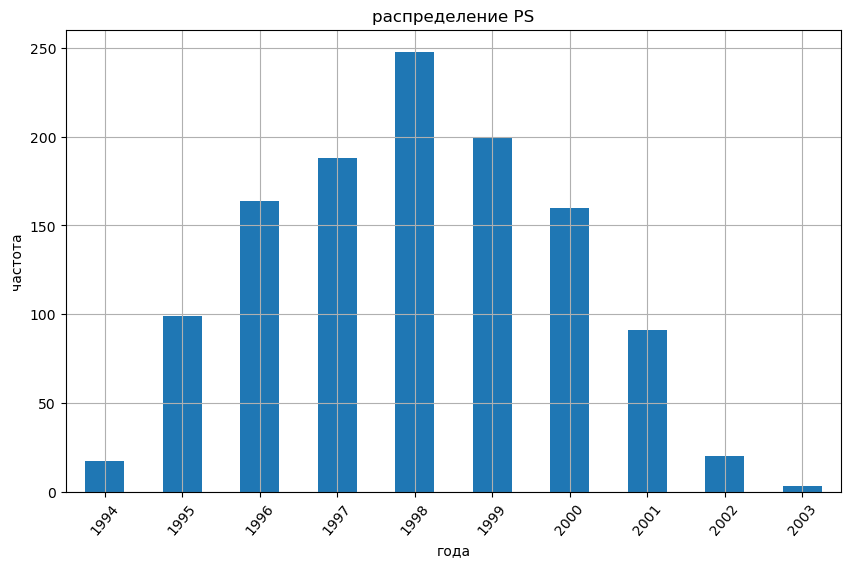

In [33]:
pl = ["PS2", "X360", "PS3", "Wii", "DS", "PS"]

def g (df, graphs):
    for graphs in pl:
        df.query('platform == @graphs').groupby('year_of_release')['year_of_release'].count()\
              .plot(kind = 'bar', grid = True, figsize = (10,6))
        plt.title(f'распределение {graphs}')
        plt.xticks(rotation=50)
        plt.xlabel('года')
        plt.ylabel('частота')
        plt.show()
        
g (df, pl)

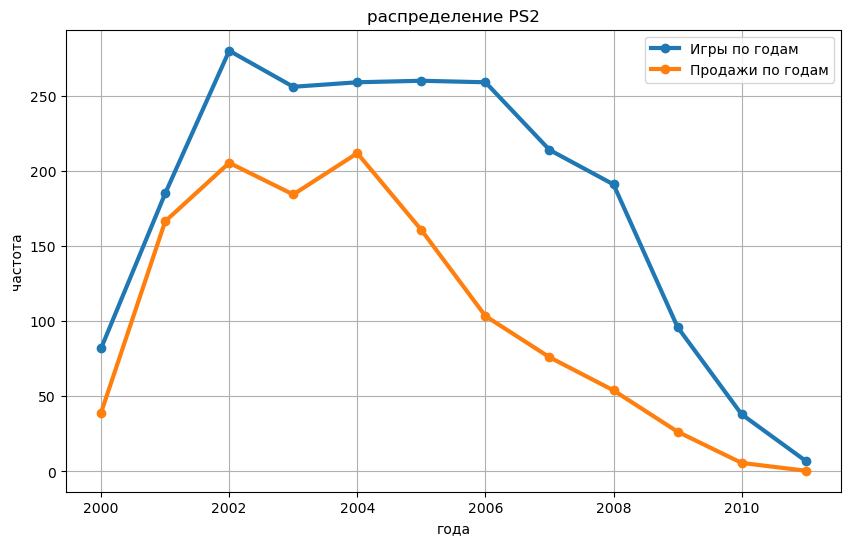

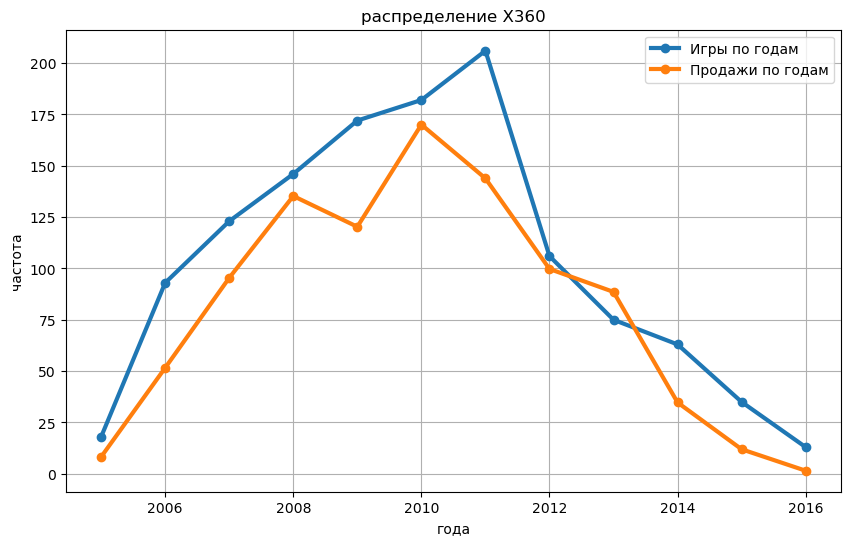

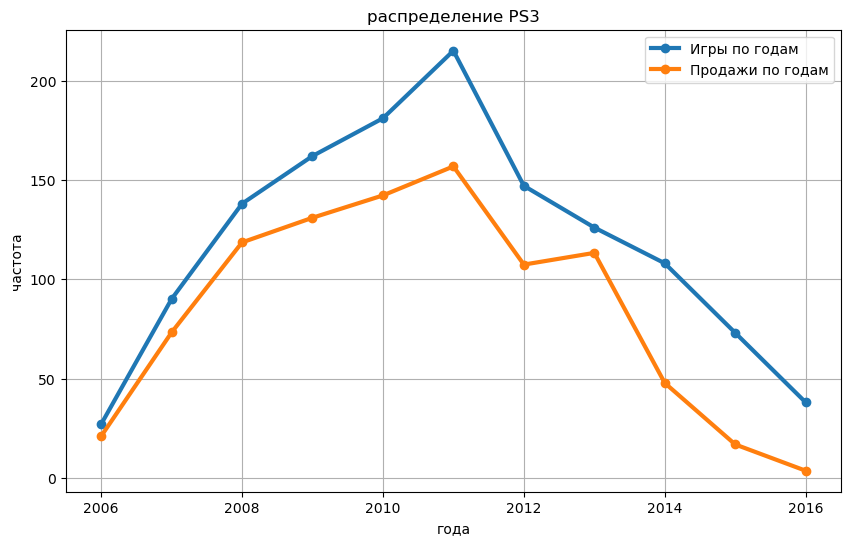

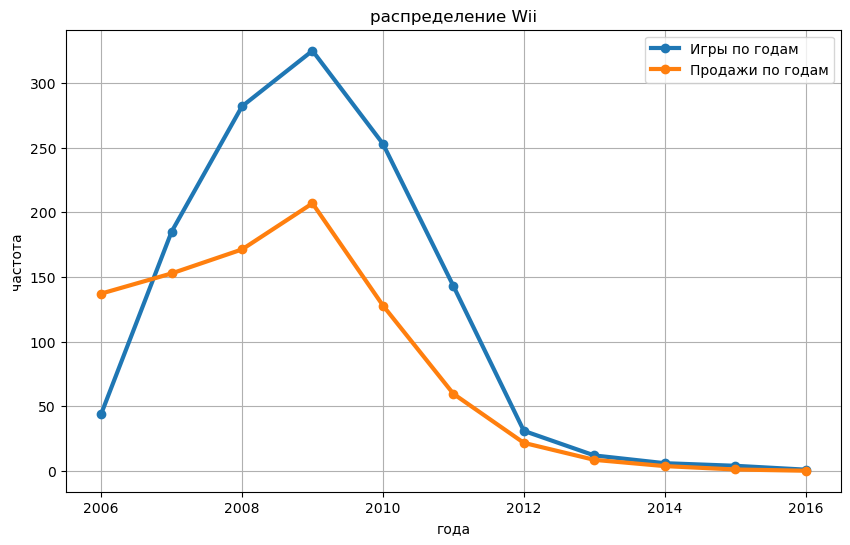

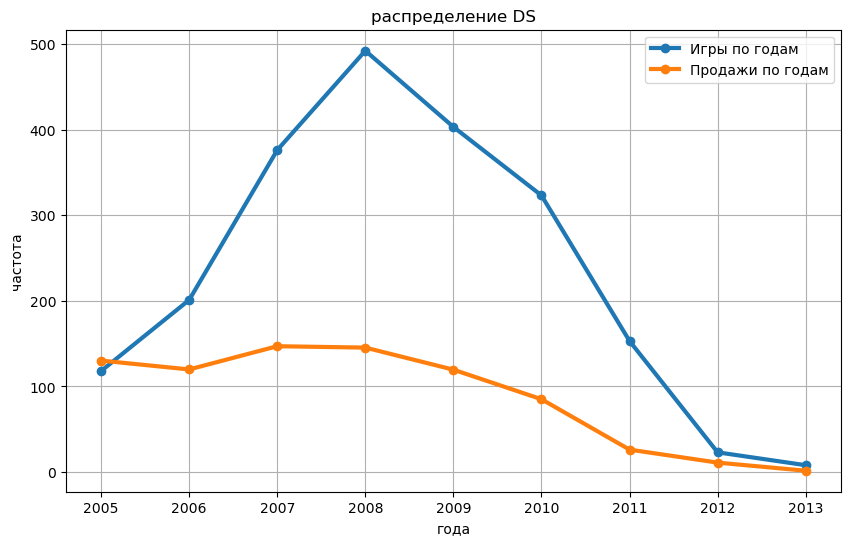

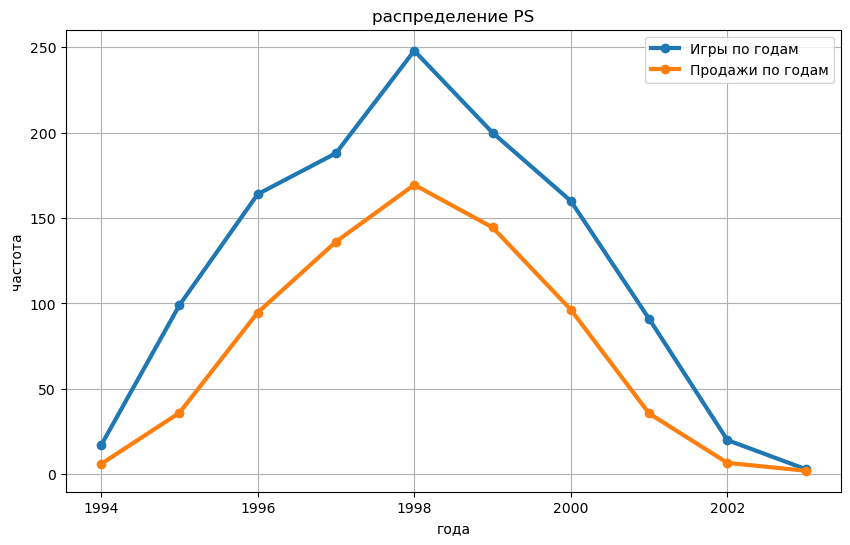

In [34]:

for plots in pl:
    plt.figure(figsize = (10,6))
    
    if plots == 'DS':
        ax = df.query('platform == @plots and year_of_release > 2004')\
            .groupby('year_of_release')['year_of_release'].count()\
            .plot(kind = 'line', style = 'o-', grid = True, linewidth = 3)
            
        df.query('platform == @plots and year_of_release > 2004').groupby('year_of_release')['total_sales'].sum()\
            .plot( ax = ax, style = 'o-', grid = True, linewidth = 3)
            
        plt.xlabel('года')
        plt.ylabel('частота')
        plt.title(f'распределение {plots}')
        plt.legend(['Игры по годам', 'Продажи по годам'])
        
    else:
        ax = df.query('platform == @plots').groupby('year_of_release')['year_of_release'].count()\
            .plot(kind = 'line', style = 'o-', grid = True, linewidth = 3)


        df.query('platform == @plots').groupby('year_of_release')['total_sales'].sum()\
            .plot( ax = ax, style = 'o-', grid = True, linewidth = 3)

        plt.xlabel('года')
        plt.ylabel('частота')
        plt.title(f'распределение {plots}')
        plt.legend(['Игры по годам', 'Продажи по годам'])
    


        plt.show()
        


In [35]:

def barplots_by_platforms(df, platform): 
    
    '''пишем функцию для построения барплота, 
       которая принимает на вход датафрейм и название платформы'''
    
    df.query('platform == @platform').groupby('year_of_release')['year_of_release'].count()\
              .plot(kind = 'bar', grid = True, figsize = (10,6))
    plt.title(f'распределение {platform}')
    plt.xticks(rotation=50)
    plt.xlabel('года')
    plt.ylabel('частота')
    plt.show()

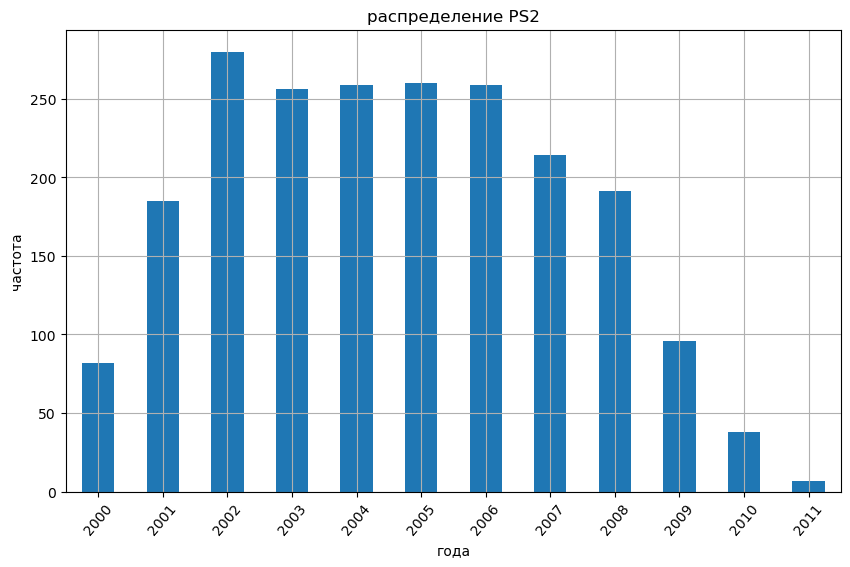

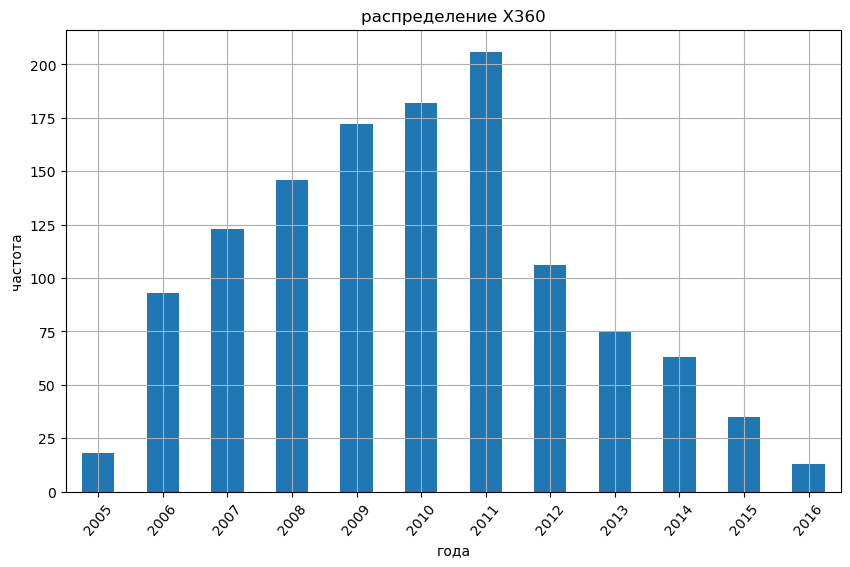

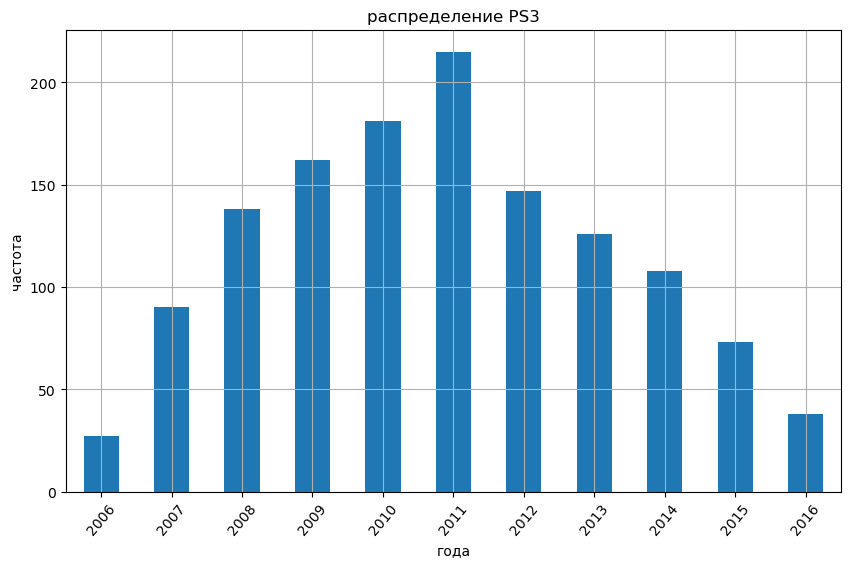

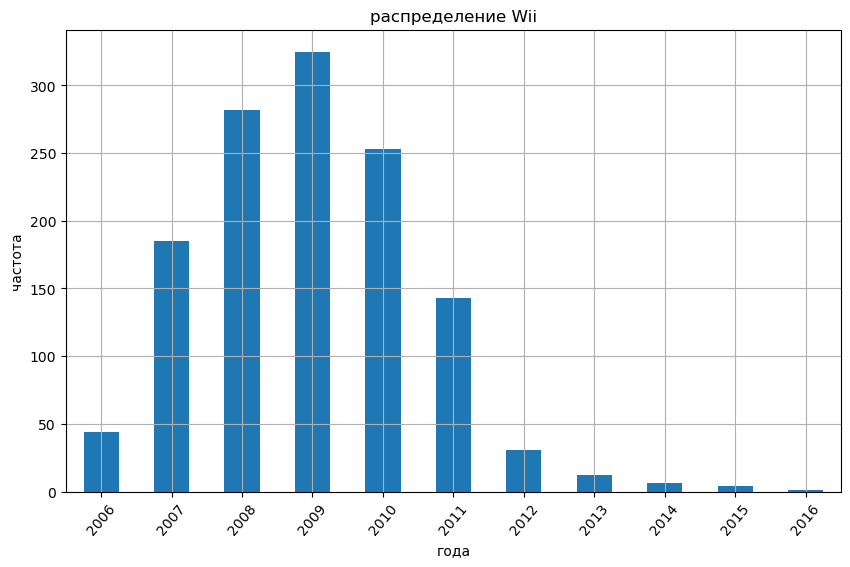

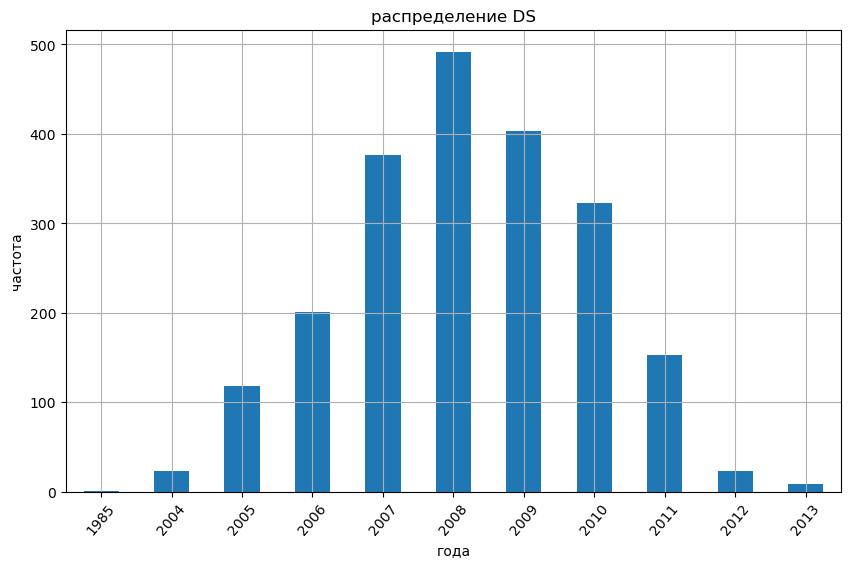

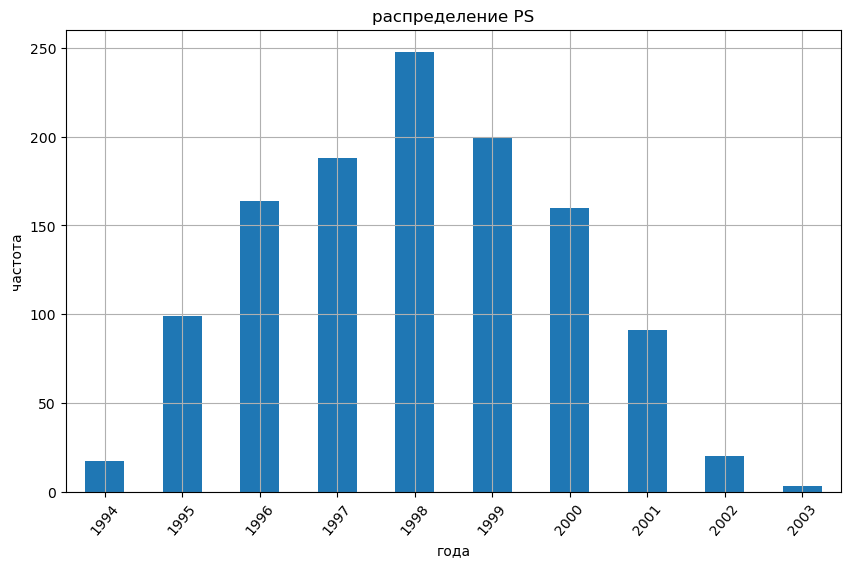

In [36]:

pl = ["PS2", "X360", "PS3", "Wii", "DS", "PS"]

for platform in pl:
   
    barplots_by_platforms(df, platform) 

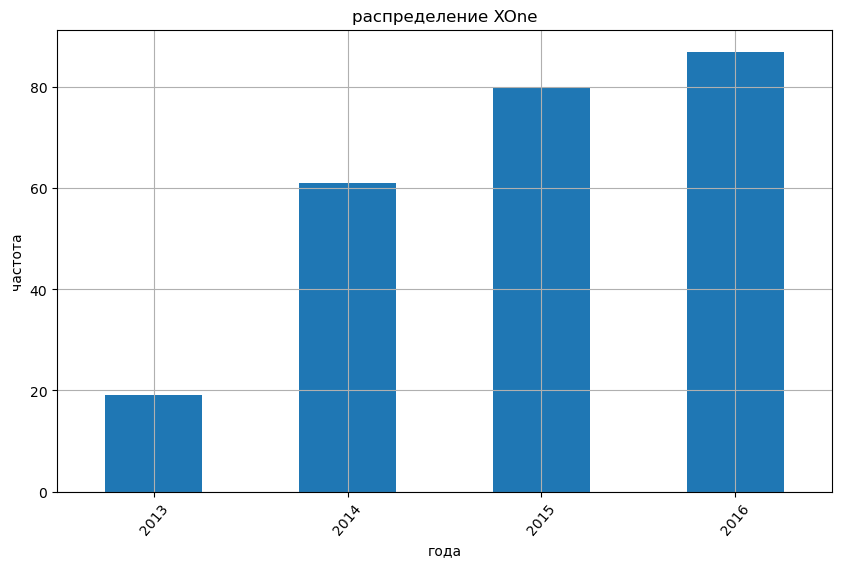

In [37]:

barplots_by_platforms(df, 'XOne') 

Видим, что игры для PS2 активно выходили с 2000 по 2006 год, далее выпускать стали реже т.к. консоль устарела. Видим два пика по количеству вышедших игр- 2002 год и 2005

Игры на X360 выходили с 2005 по 2016. Рост числа игр происходил с 2005 по 2010-2011 года, далее пошёл на спад. Максимальное число игр вышло в 2010

Игры на PS3 начали выходить с момента выхода консоли в 2006 года и число игр возрастало до 2011 года. Наибольшее число игр вышло в 2011

Игры на Wii выходили с 2006 по 2016. Наибольшее число игр вышло в период с 2008 по 2010 года с пиком в 2009

Игры на PS выходили с 1994 по 2002 года с наибольшим средним числом игр вышедших в 1998. 

Игры на DS выходили с 2004 по 2014 года. Можно наблюдать пиковое количество вышедших игр в 2008 году. Любопытно, что игр произведено много, но продажи не повторяют динамику их выхода

In [38]:

(df.query('year_of_release > 1985 & platform.isin(@pl)').groupby('platform') 
                                                       .agg({'year_of_release' : 'nunique'}) 
                                                       .mean() 
)

year_of_release    11.0
dtype: float64

Средняя продолжительность жизни консоли 11 лет

In [39]:
# смотрим на выброс. Нинтендо свою DS  в 1985 ещё не создала, да и продажи у игры не выдающиеся. Можно не учитывать

df[(df['platform'] == 'DS') & (df['year_of_release'] < 2000)]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
15704,Strongest Tokyo University Shogi DS,DS,1985,Action,0.0,0.0,0.02,0.0,NaN,NaN,NaN,0.02


Стоит взглянуть и на более актуальные консоли врде PS4, вышедшей в 2013 году и XOne, вышедшей в том же 2013 году

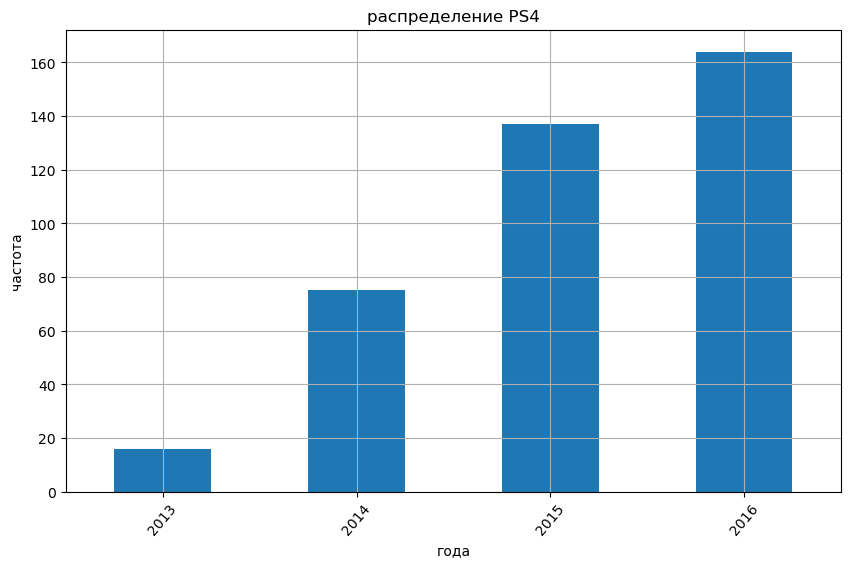

In [40]:
barplots_by_platforms(df, 'PS4')

In [41]:
def lineplot_by_platform (df, platform):
    plt.figure(figsize = (10,6))
    ax = df.query('platform == @platform').groupby('year_of_release')['year_of_release'].count()\
        .plot(kind = 'line', style = 'o-', grid = True, linewidth = 3)


    df.query('platform == @platform').groupby('year_of_release')['total_sales'].sum()\
        .plot( ax = ax, style = 'o-', grid = True, linewidth = 3)

    
    plt.xlabel('года')
    plt.ylabel('частота')
    plt.title(f'распределение {platform}')
    plt.legend(['Игры по годам', 'Продажи по годам'])
    

    plt.show()

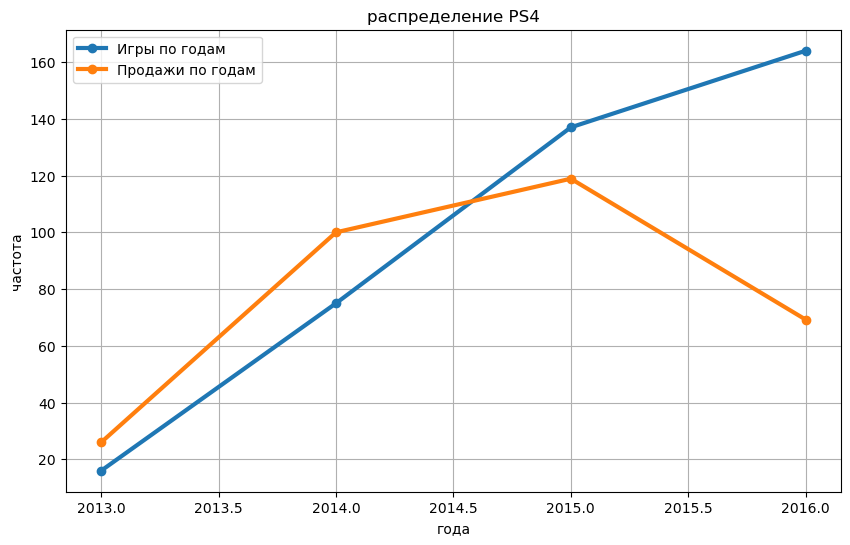

In [42]:
lineplot_by_platform(df, 'PS4')

Количество игр, вышедших для PS4 росло с 2013 по 2016, однако продажи игр с 2015 до 2016 пошли на спад. В описании к проекту была информаиция, что даные за 2016 год не полные. Вероятно, это причина такго поведения продаж, с другой стороны вполне вероятно, что продажи действительно упали 

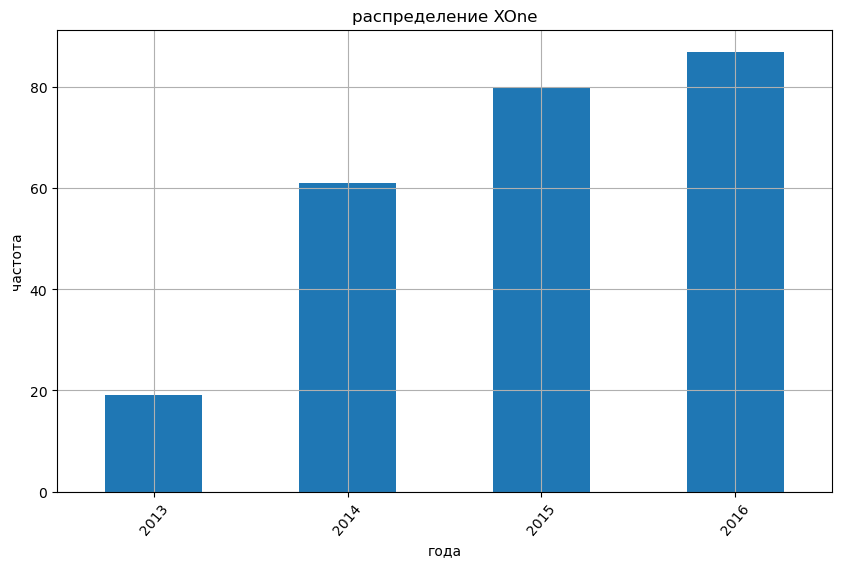

In [43]:

barplots_by_platforms(df, 'XOne')

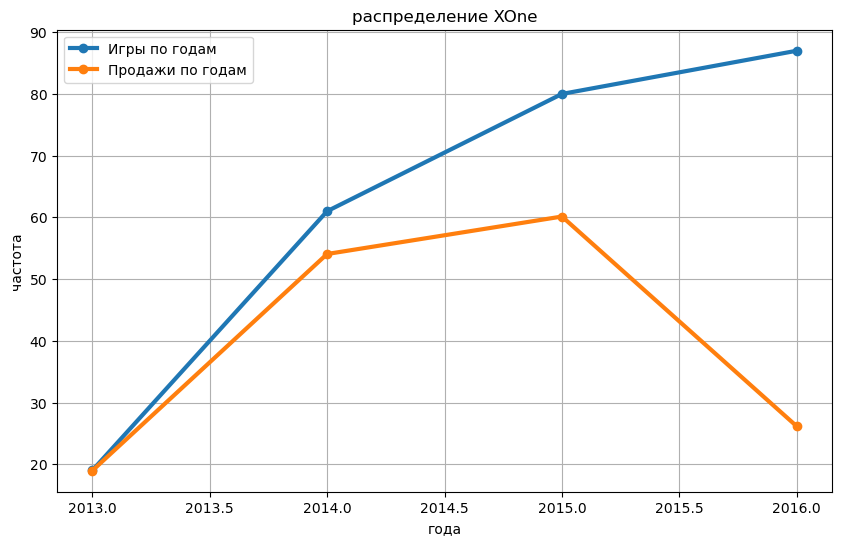

In [44]:
lineplot_by_platform(df, "XOne")

Количество вышедших игр и продажи игр практически повторяют график для PS4. Игр выпускают всё больше и больше, но продажи с 2015 до 2016 года упали

### Данные за актуальный период

К выбору актуального периода нужно подойти исходя из того, для какой платформы мы хотим узнать актуальный период. Более того, **какую платформу** мы считаем актуальной. Исходя из графиков выше видно, что **до 2016** года в топах продаж были консоли PS2, X360, Wii, Ds, PS3, Ps. Вот только некоторые из обозначенных консолей перестали получать новые игры задолго до 2016 при том, что продажи по предыдуищим годам у них могли быть выше остальных изученных платформ. Таким образом к 2016-му году их продажи постепенно падали и игр выходило всё меньше. Причиной тому - выход нового поколения консолей, а именно PS4 и Xone

Тем не менее за актуальный период примем 2014- 2016 года. А платформы для изучения возьмём PS4 и XOne

In [45]:
df.query('year_of_release >= 2014').groupby('platform')['total_sales'].sum().sort_values(ascending = False).head(10)

platform
PS4     288.15
XOne    140.36
3DS      86.68
PS3      68.18
X360     48.22
WiiU     42.98
PC       27.05
PSV      22.40
Wii       5.07
PSP       0.36
Name: total_sales, dtype: float64

видим, что за 2015-2016 года больше всего игр продано именно для PS4 и Xbox One

In [46]:
# делаю датафрейм с актуальным периодом

actual = df.query('year_of_release >= 2014').copy() 

In [47]:
actual.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,NaN,14.63
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,NaN,NaN,NaN,11.68
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58
87,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,NaN,NaN,NaN,7.98


In [48]:

print("количество проданных копий игр для PS3 и X360 за 2014 - 2016 год:",\
      actual.query('platform == ["PS3", "X360"]')['total_sales'].sum())
print("количество проданных копий игр для PS4 и XOne за 2014 - 2016 год:", \
      actual.query('platform == ["PS4", "XOne"]')['total_sales'].sum())


количество проданных копий игр для PS3 и X360 за 2014 - 2016 год: 116.4
количество проданных копий игр для PS4 и XOne за 2014 - 2016 год: 428.51000000000005


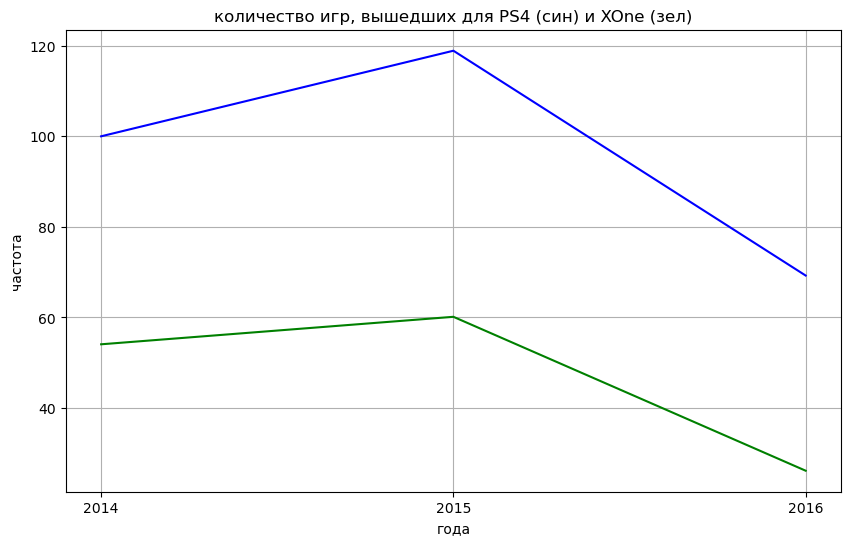

In [49]:
(actual.query('platform == "PS4"').groupby('year_of_release')['total_sales'].sum()
 .plot(figsize = (10,6), grid = True, color = 'blue')
)

(actual.query('platform == "XOne"').groupby('year_of_release')['total_sales'].sum()
 .plot(figsize = (10,6), grid = True, color = 'green')
)

plt.xlabel('года')
plt.ylabel('частота')
plt.title('количество игр, вышедших для PS4 (син) и XOne (зел)')

plt.xticks(actual.query('year_of_release >= 2014')['year_of_release'].unique()) # код ревьюера

plt.show()

Cуммарные продажи за период 2014-2016 приводим выше. PS4 288.15 млн проданных копий игр, XOne 140.36 млн проданных копий. Однако, если допустить, что данные за 2016 год в датафрейме полные, то продажи у обеих консолей снижаются

### Строим график «ящик с усами» по глобальным продажам игр в разбивке по платформам. 

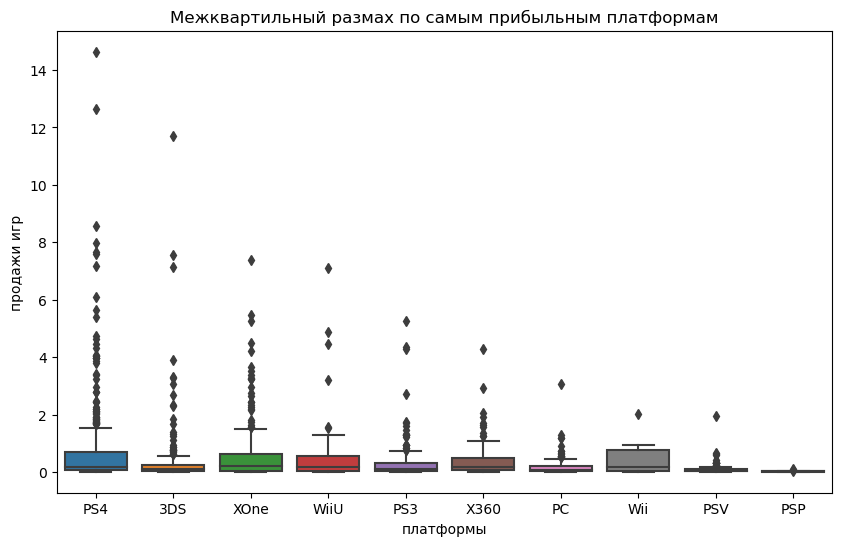

In [50]:
plt.figure(figsize = (10,6))
sns.boxplot(data = actual, x = 'platform', y = 'total_sales')
plt.xlabel('платформы')
plt.ylabel('продажи игр')
plt.title('Межквартильный размах по самым прибыльным платформам')

plt.show()



видим страшный выборс у Wii, нужно посмотреть, что это

In [51]:
actual_platforms = actual['platform'].unique()

for top_games in actual_platforms:
    
    print(top_games)
    print(actual.query('platform == @top_games')[['name','total_sales']]\
                .sort_values(by = 'total_sales',ascending = False).head())
    print('')

PS4
                              name  total_sales
31       Call of Duty: Black Ops 3        14.63
42              Grand Theft Auto V        12.62
77                         FIFA 16         8.58
87    Star Wars Battlefront (2015)         7.98
92  Call of Duty: Advanced Warfare         7.66

3DS
                                          name  total_sales
47   Pokemon Omega Ruby/Pokemon Alpha Sapphire        11.68
96         Super Smash Bros. for Wii U and 3DS         7.55
108                           Pokemon Sun/Moon         7.14
311                  Monster Hunter 4 Ultimate         3.89
404                           Monster Hunter X         3.32

XOne
                               name  total_sales
99        Call of Duty: Black Ops 3         7.39
165              Grand Theft Auto V         5.47
179  Call of Duty: Advanced Warfare         5.26
241               Halo 5: Guardians         4.49
269                       Fallout 4         4.22

WiiU
                                     

Заодно далее можно посмотреть и топы продаж для других консолей из списка самых популярных

Обнаружены самые популярные игры для каждой консоли. Также интересно отметить, что для каждой консоли есть игры, которые на порядок лучше продаются, чем остальные игры. Для высокопроизводительных и относительно современных консолей (PS3, PS4, X360, XOne) в числе самых поплярных игр находятся разные части игр серии GTA, а также разные части серии игр Call of Duty. Для Wii самыми популярными играми оказались Just Dance 2015 и 2016. На PC The Sims 4 и Fallout 4. На WiiU Mario Kart 8

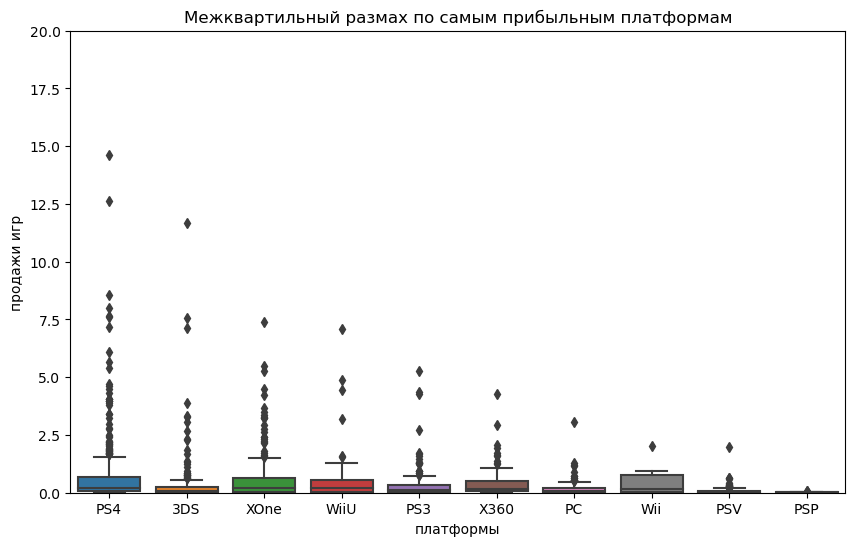

In [52]:
# повторно строим ящики, но ограничим продажи 20 млн копий на игру.


plt.figure(figsize = (10,6))
sns.boxplot(data = actual, x = 'platform', y = 'total_sales')
plt.xlabel('платформы')
plt.ylabel('продажи игр')
plt.title('Межквартильный размах по самым прибыльным платформам')

plt.ylim(0, 20)

plt.show()

всё равно можно наблюдать выбросы, но теперь они более-менее похожи у всех платформ, что может означать, что аномально продаваемые игры (= очень популярные) есть у каждой из исследуемых платформ 

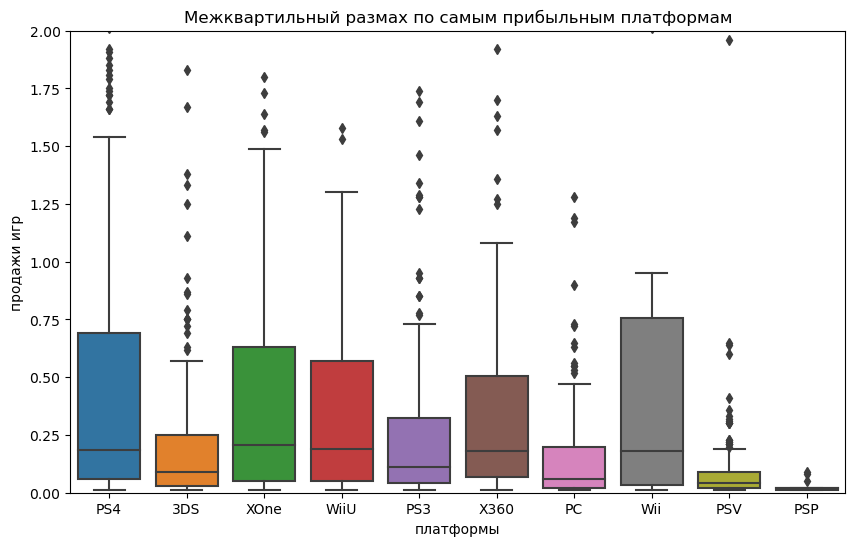

In [53]:
# нужно посмотреть на сами ящики, поэтому огранчиваю выбросы в продажах игр 2-мя млн проданных копий


plt.figure(figsize = (10,6))
sns.boxplot(data = actual, x = 'platform', y = 'total_sales')
plt.xlabel('платформы')
plt.ylabel('продажи игр')
plt.title('Межквартильный размах по самым прибыльным платформам')

plt.ylim(0, 2)

plt.show()

видим, что распределение по проданным играм у всех платформ смещено вправо

### Корреляции отзывов и продаж

 *Посмотрите, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. Сформулируйте выводы.*

In [54]:
print(actual.query('user_score > 0 and critic_score >0').shape[0])
print(actual.query('critic_score >0').shape[0])
print(actual.query('user_score > 0').shape[0])

704
718
888


In [55]:
actual[actual['user_score'] == 0]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales


In [56]:
actual[actual['critic_score'] == 0]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales


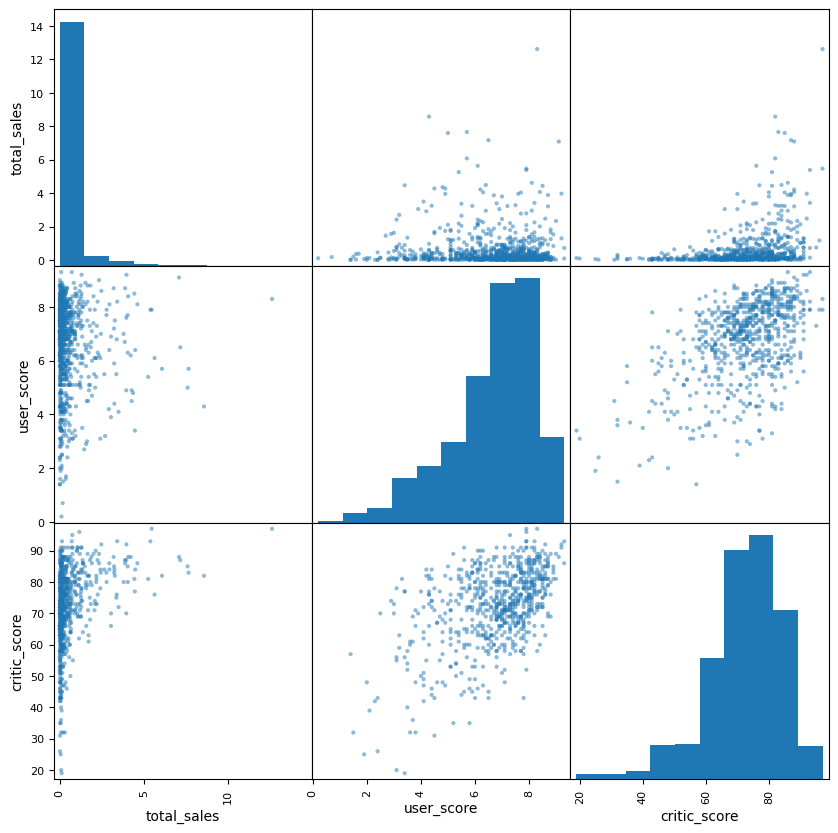

              total_sales  user_score  critic_score
total_sales      1.000000    -0.01307      0.328105
user_score      -0.013070     1.00000      0.504460
critic_score     0.328105     0.50446      1.000000


In [57]:
# Строю матрицу рассеяния суммарно для всех выбранных платформ

pd.plotting.scatter_matrix(actual[['total_sales', 'user_score', 'critic_score']], figsize = (10,10), alpha = 0.5)

plt.show()

print(actual[['total_sales', 'user_score', 'critic_score']].corr())

In [58]:
actual[['total_sales', 'user_score', 'critic_score']].corr()

,total_sales,user_score,critic_score
total_sales,1.000000,-0.01307,0.328105
user_score,-0.013070,1.00000,0.504460
critic_score,0.328105,0.50446,1.000000


Суммарно по платформам и продажам корреляций не наблюдается, посмотрим, что будет дальше на конкретных случаях

In [59]:
pl_l = ['PS4', 'PS3', 'X360', 'XOne']

In [60]:
def scatterplot_by_platform (df, platform):
    df.query('platform == @platform')\
        .plot.scatter(x = 'critic_score', y = 'total_sales', figsize = (10,6), alpha = 0.7)
        
    plt.xlabel('отзывы критиков')
    plt.ylabel('продажи')
    plt.title(f'Зависимость продаж от отзывов критиков для {platform}')
 
    df.query('platform == @platform')\
        .plot.scatter(x = 'user_score', y = 'total_sales', figsize = (10,6), alpha = 0.7)
        
    plt.xlabel('отзывы пользователей')
    plt.ylabel('продажи')
    plt.title(f'Зависимость продаж от отзывов пользователей для {platform}')

    plt.show()

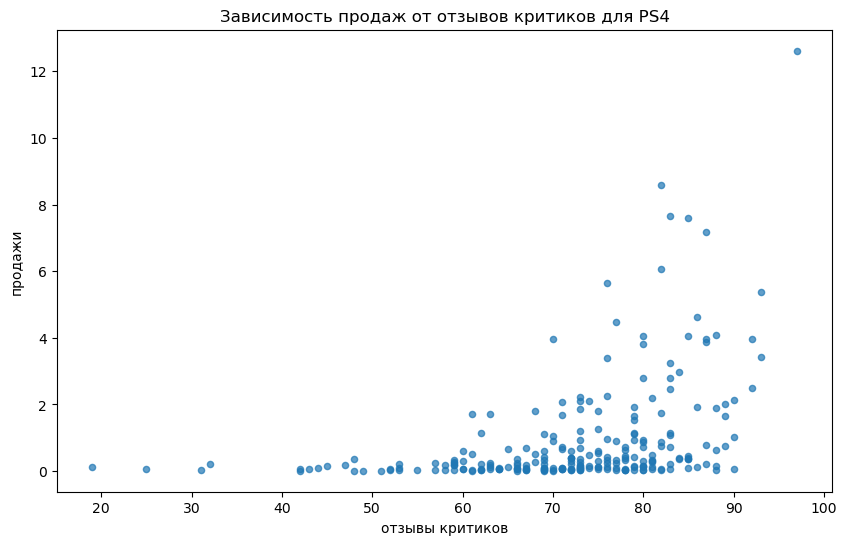

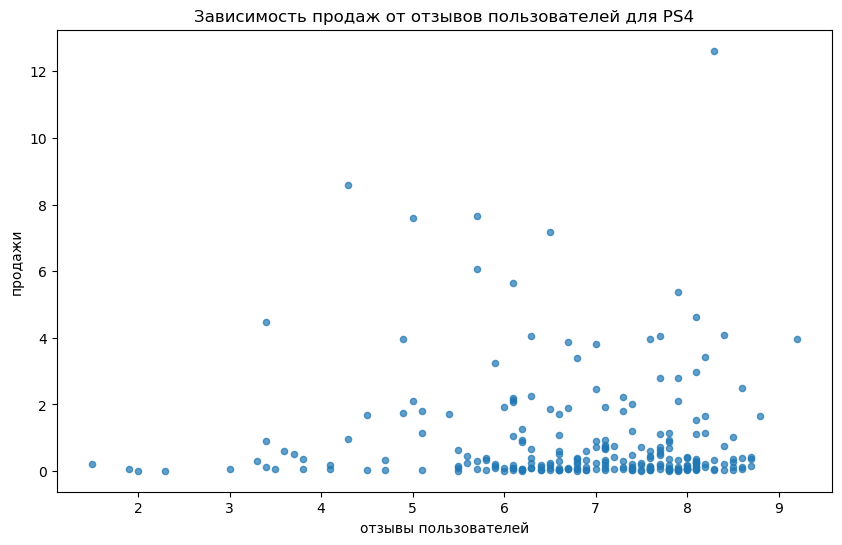

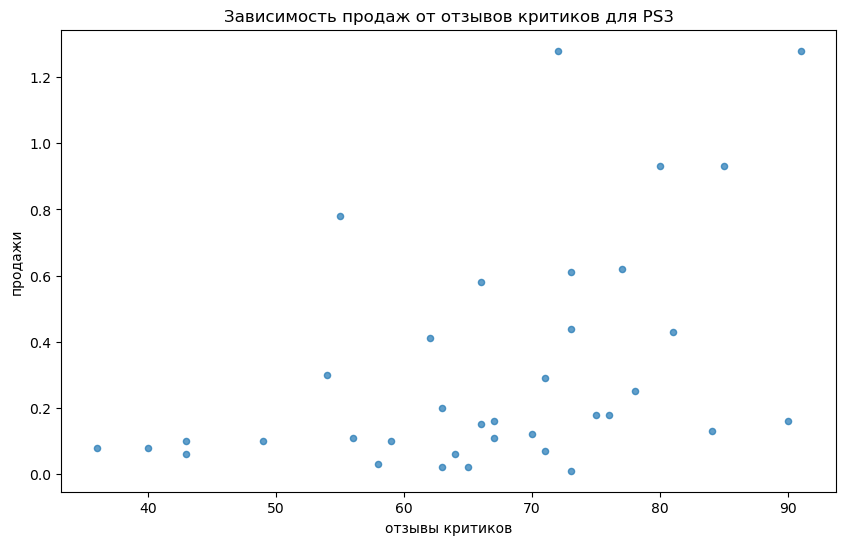

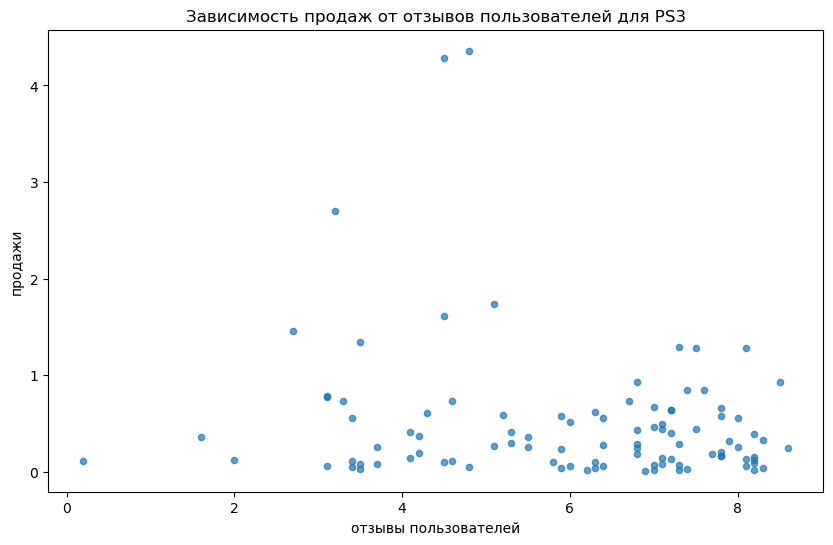

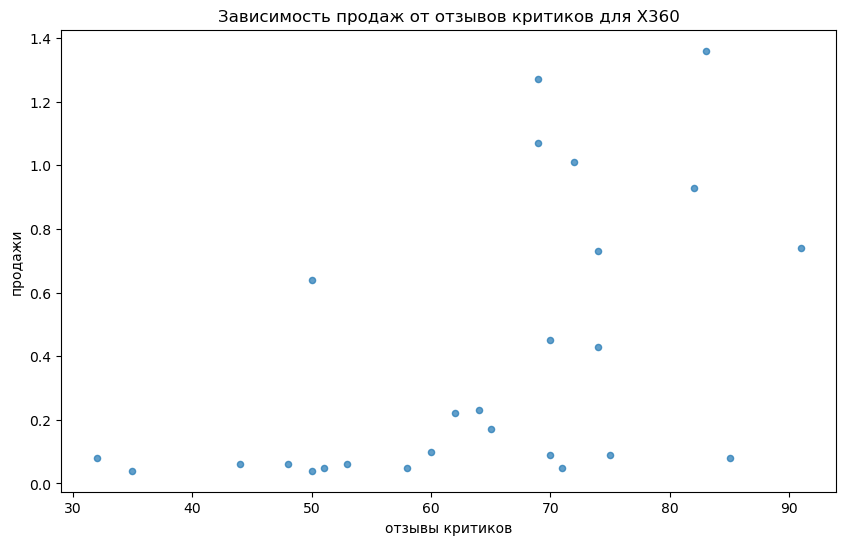

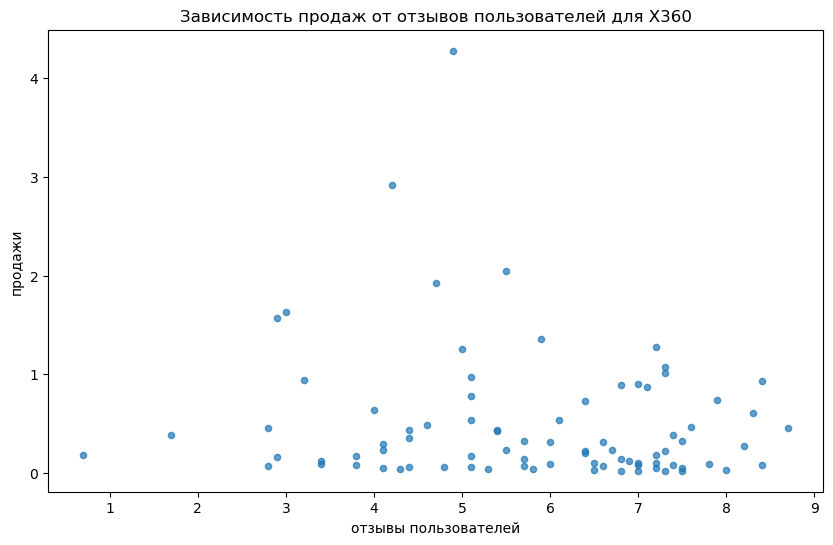

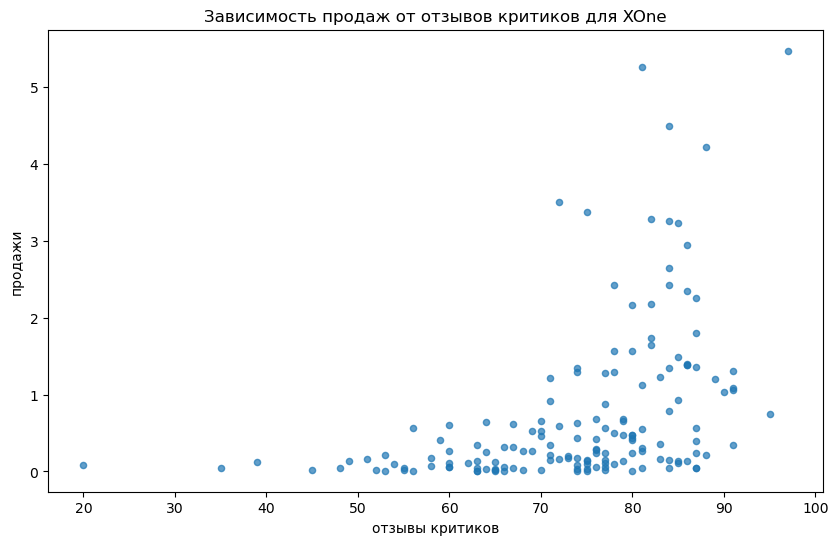

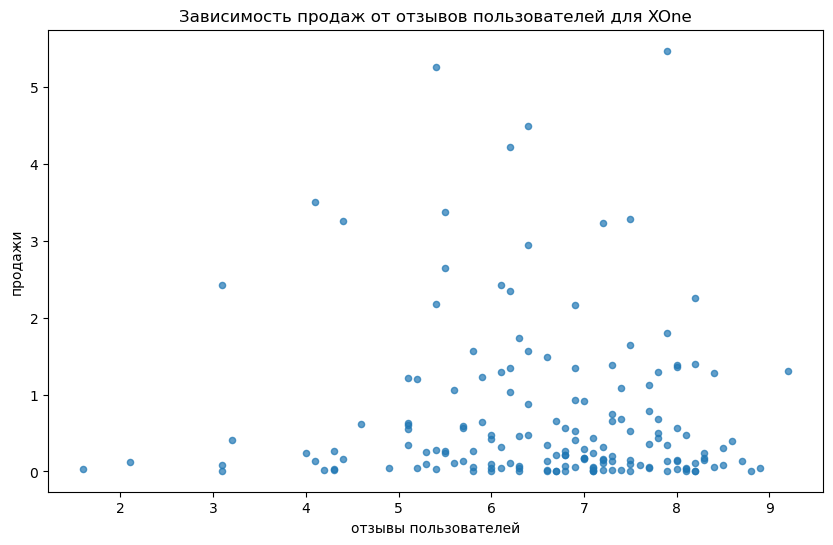

In [61]:
for c in pl_l:
    scatterplot_by_platform(actual, c)

In [62]:
# создаю датафрейм для функции, которая покажет корреляции

actual_correlation = actual[['platform','total_sales', 'user_score', 'critic_score']].copy()
actual_correlation

,platform,total_sales,user_score,critic_score
31,PS4,14.63,NaN,NaN
42,PS4,12.62,8.3,97.0
47,3DS,11.68,NaN,NaN
77,PS4,8.58,4.3,82.0
87,PS4,7.98,NaN,NaN
...,...,...,...,...
16431,PSV,0.01,NaN,NaN
16435,PSV,0.01,NaN,NaN
16438,PS3,0.01,NaN,NaN
16440,PSV,0.01,NaN,NaN


In [63]:
def correlation_by_platform(df, platform):
    print(df.query('platform == @platform').corr())
    

In [64]:
for correlation in pl_l:
    print(f"таблица корреляций для {correlation}")
    print(correlation_by_platform(actual_correlation, correlation))
    print("")

таблица корреляций для PS4
              total_sales  user_score  critic_score
total_sales      1.000000   -0.040132      0.402661
user_score      -0.040132    1.000000      0.546434
critic_score     0.402661    0.546434      1.000000
None

таблица корреляций для PS3
              total_sales  user_score  critic_score
total_sales      1.000000   -0.166761      0.446575
user_score      -0.166761    1.000000      0.693445
critic_score     0.446575    0.693445      1.000000
None

таблица корреляций для X360
              total_sales  user_score  critic_score
total_sales      1.000000   -0.138445      0.525723
user_score      -0.138445    1.000000      0.625309
critic_score     0.525723    0.625309      1.000000
None

таблица корреляций для XOne
              total_sales  user_score  critic_score
total_sales      1.000000   -0.070384      0.428677
user_score      -0.070384    1.000000      0.440977
critic_score     0.428677    0.440977      1.000000
None



C:\Users\jahlo\AppData\Local\Temp\ipykernel_11192\1374303477.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(df.query('platform == @platform').corr())
C:\Users\jahlo\AppData\Local\Temp\ipykernel_11192\1374303477.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(df.query('platform == @platform').corr())
C:\Users\jahlo\AppData\Local\Temp\ipykernel_11192\1374303477.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(df.query('platform == @platform').corr()

По итогам видим, что корреляции между отзывами критиков или пользоваталей и продажами игр нет. Любопытно, что зачастую отзывы критиков и пользователей имеют некоторую степень корреляции т.е. мнения во многом совпадают.

У разных консолей ситуация похожая. Мнение критиков и пользователей очень слабо влияет на продажи игр

### Распределение игр по жанрам

*Посмотрите на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?*

In [65]:
actual['genre'].value_counts()

Action          619
Role-Playing    221
Adventure       185
Sports          161
Shooter         128
Misc            113
Racing           69
Fighting         60
Simulation       44
Platform         38
Strategy         37
Puzzle           14
Name: genre, dtype: int64

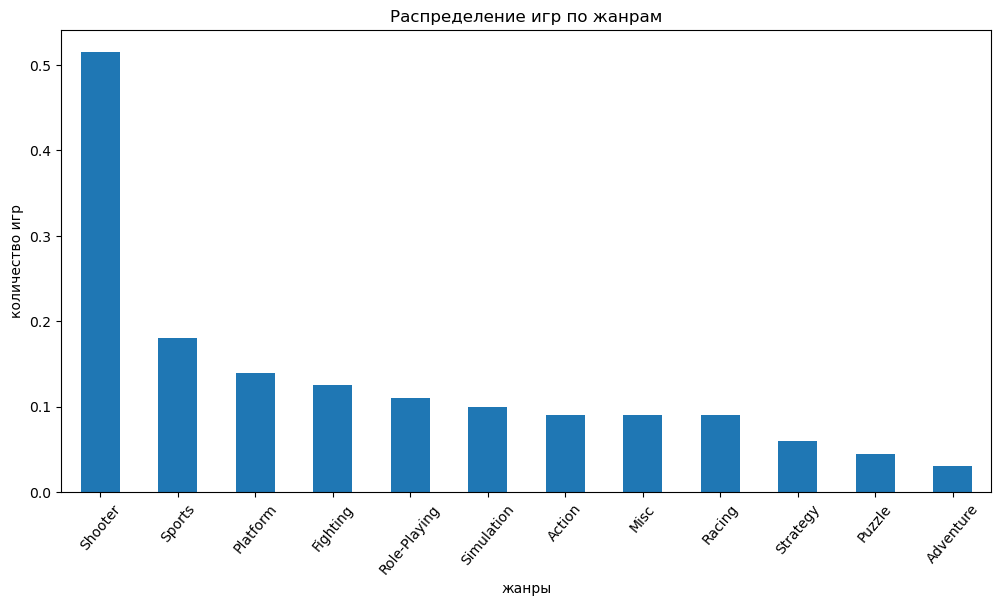

In [66]:
actual.groupby('genre')['total_sales'].median().sort_values(ascending = False).plot(kind = 'bar', figsize = (12,6))

plt.xticks(rotation = 50)
plt.title('Распределение игр по жанрам')
plt.xlabel('жанры')
plt.ylabel('количество игр')
plt.show()

Видим, что наиболее популярные жанры за актуальный период составляют: Shooter, Sports, Misc, далее примерно одинаково распространены Action, Role-playing, Platform и Fighting

## Портрет пользователя каждого региона

*Определить портрет для пользователя каждого региона (NA, EU, JP):*

*Самые популярные платформы (топ-5). Различия в долях продаж.*

*Самые популярные жанры (топ-5).*

*Влияет ли рейтинг ESRB на продажи в отдельном регионе?*

### Портрет пользователя из Северной Америки

Рейтинг ESRB:
- E - для всех возрастных категорий
- E10+ - для пользователей старше 10 лет
- T - для лиц старше 13 лет
- M - для лиц старше 17 лет
- АО - старше 18 лет
- ЕС - для детей младшего возраста
- RP - категория не присвоена
- K-A - всё равно, что E

In [67]:
# меняю пропуски в рейтинге на "другое"

actual['rating'].fillna('Другое', inplace = True)
actual

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,Другое,14.63
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,NaN,NaN,Другое,11.68
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58
87,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,NaN,NaN,Другое,7.98
...,...,...,...,...,...,...,...,...,...,...,...,...
16431,Strawberry Nauts,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,Другое,0.01
16435,Aiyoku no Eustia,PSV,2014,Misc,0.00,0.00,0.01,0.00,NaN,NaN,Другое,0.01
16438,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,Другое,0.01
16440,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,Другое,0.01


In [68]:
# создаю датафрейм с данными по Северной Америке. За основу для фильтрации беру все продажи больше 0.1 т.е. 100000 копий игр

NA = actual.query('na_sales > 0.1')[['platform', 'year_of_release', 'genre', 'rating', 'na_sales']].copy()
NA.head()

,platform,year_of_release,genre,rating,na_sales
31,PS4,2015,Shooter,Другое,6.03
42,PS4,2014,Action,M,3.96
47,3DS,2014,Role-Playing,Другое,4.35
77,PS4,2015,Sports,E,1.12
87,PS4,2015,Shooter,Другое,2.99


In [69]:
print('Северная Америка')
print('')
print('Жанровые предпочтения')
print(NA.groupby('genre')['na_sales'].count().sort_values(ascending = False))
print('')
print('Предпочтения в игровых платформах')
print(NA.groupby('platform')['na_sales'].count().sort_values(ascending = False))
print('')
print('Предпочтения в рейтингах игр')
print(NA.groupby('rating')['na_sales'].count().sort_values(ascending = False))

Северная Америка

Жанровые предпочтения
genre
Action          148
Shooter          86
Sports           68
Role-Playing     53
Misc             34
Fighting         16
Racing           15
Adventure        13
Platform         13
Simulation        5
Strategy          4
Puzzle            1
Name: na_sales, dtype: int64

Предпочтения в игровых платформах
platform
PS4     136
XOne    113
X360     55
PS3      51
3DS      35
WiiU     35
PC       24
Wii       4
PSV       3
Name: na_sales, dtype: int64

Предпочтения в рейтингах игр
rating
M         137
E10+       90
Другое     86
E          72
T          71
Name: na_sales, dtype: int64


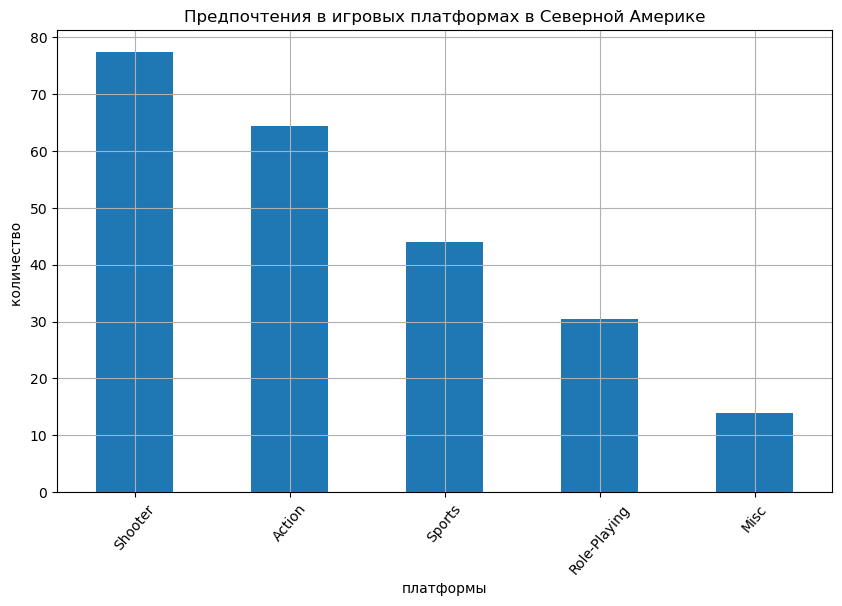

In [70]:
(NA.groupby('genre')['na_sales'].sum().sort_values(ascending = False)
 .head().plot(kind = 'bar', grid = True, figsize = (10,6)))
plt.xticks(rotation = 50)
plt.title('Предпочтения в игровых платформах в Северной Америке')
plt.xlabel('платформы')
plt.ylabel('количество ')

plt.show()

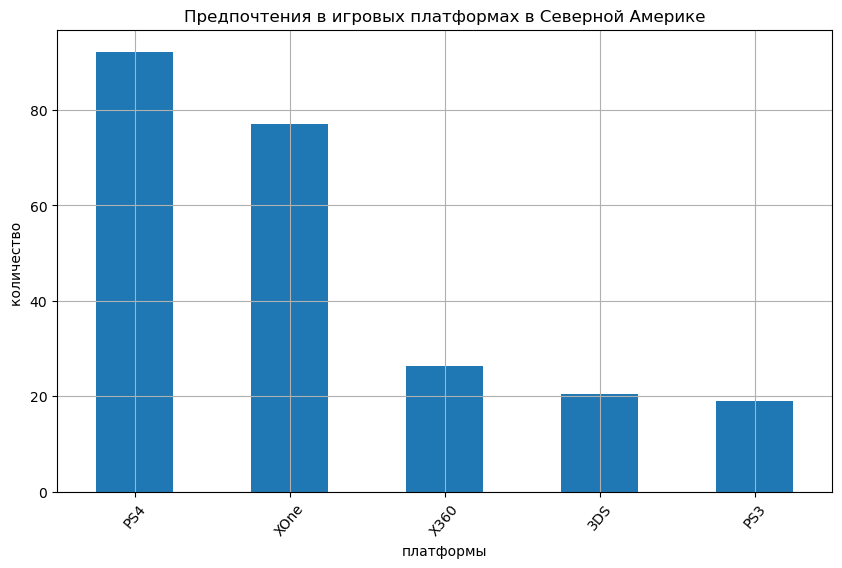

In [71]:
(NA.groupby('platform')['na_sales'].sum().sort_values(ascending = False)
 .head().plot(kind = 'bar', grid = True, figsize = (10,6)))
plt.xticks(rotation = 50)
plt.title('Предпочтения в игровых платформах в Северной Америке')
plt.xlabel('платформы')
plt.ylabel('количество ')

plt.show()

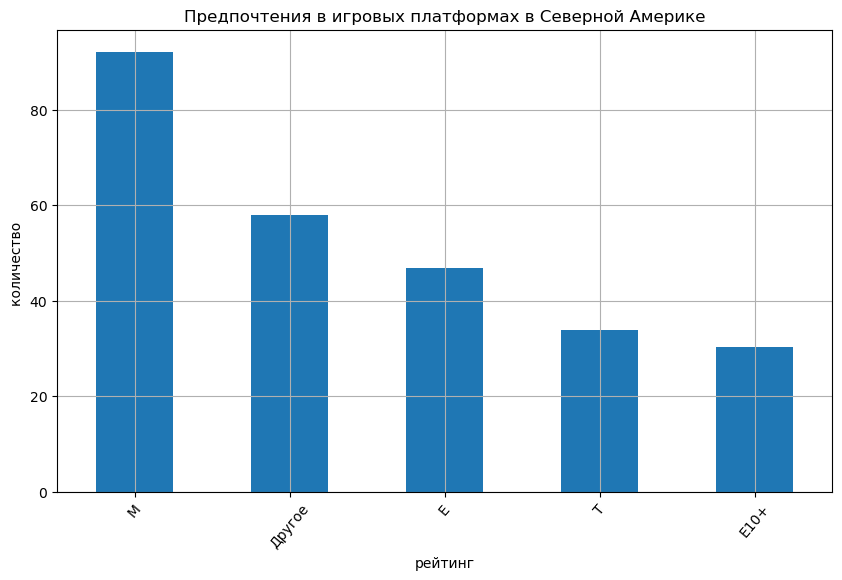

In [72]:
(NA.groupby('rating')['na_sales'].sum().sort_values(ascending = False)
 .head().plot(kind = 'bar', grid = True, figsize = (10,6)))
plt.xticks(rotation = 50)
plt.title('Предпочтения в игровых платформах в Северной Америке')
plt.xlabel('рейтинг')
plt.ylabel('количество ')

plt.show()

В Северной Америке предпочитают игры в жанрах Shooter и Action, на третьем месте Sports, далее Role-playing, на пятом месте Racing.

Наиболее распространённые платформы для игр: PS4 и Xbox one, Wii, 3DS, PC.

Большую популярность имеют игры с жанром М т.е. для лиц старше 17 лет. Далее следуют игры с неопределённым жанром, затем E, Т, Е10+.

### Портрет пользователя из Европы

In [73]:
EU = actual.query('eu_sales > 0.1')[['platform', 'year_of_release', 'genre', 'rating', 'eu_sales']].copy()
EU.head()

,platform,year_of_release,genre,rating,eu_sales
31,PS4,2015,Shooter,Другое,5.86
42,PS4,2014,Action,M,6.31
47,3DS,2014,Role-Playing,Другое,3.49
77,PS4,2015,Sports,E,6.12
87,PS4,2015,Shooter,Другое,3.49


In [74]:
# в Европе предпочитают играть в экшн- и спортивные игры

print('Европа')
print('')
print('Жанровые предпочтения')
print(EU.groupby('genre')['eu_sales'].count().sort_values(ascending = False))
print('')
print('Предпочтения в игровых платформах')
print(EU.groupby('platform')['eu_sales'].count().sort_values(ascending = False))
print('')
print('Предпочтения в рейтингах игр')
print(EU.groupby('rating')['eu_sales'].count().sort_values(ascending = False))

Европа

Жанровые предпочтения
genre
Action          157
Shooter          90
Sports           60
Role-Playing     46
Misc             26
Racing           25
Adventure        15
Fighting         15
Simulation       14
Platform         13
Strategy          7
Puzzle            1
Name: eu_sales, dtype: int64

Предпочтения в игровых платформах
platform
PS4     164
XOne     89
PS3      53
PC       46
X360     43
WiiU     31
3DS      30
Wii       7
PSV       6
Name: eu_sales, dtype: int64

Предпочтения в рейтингах игр
rating
M         140
Другое    103
E10+       81
E          79
T          66
Name: eu_sales, dtype: int64


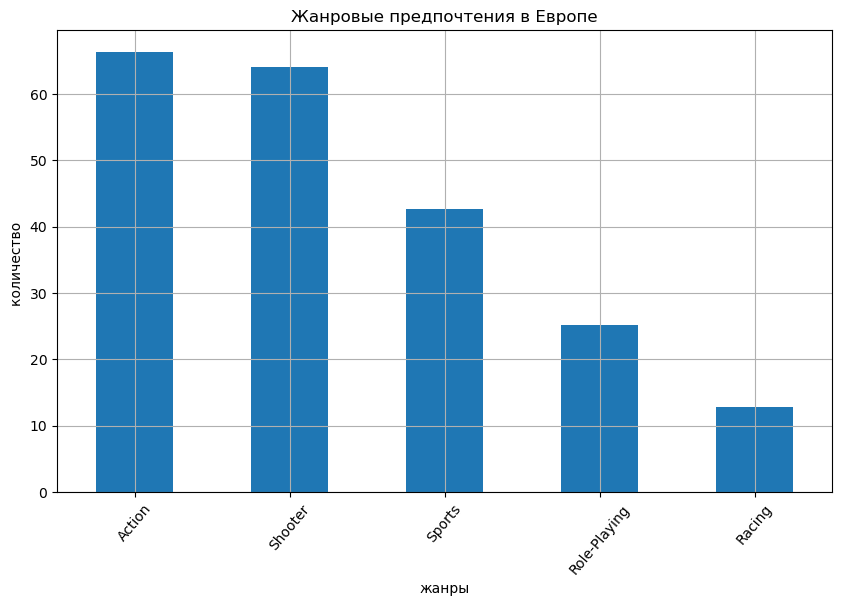

In [75]:
(EU.groupby('genre')['eu_sales'].sum().sort_values(ascending = False)\
 .head().plot(kind = 'bar', grid = True, figsize = (10,6)))
plt.xticks(rotation = 50)
plt.title('Жанровые предпочтения в Европе')
plt.xlabel('жанры')
plt.ylabel('количество ')


plt.show()

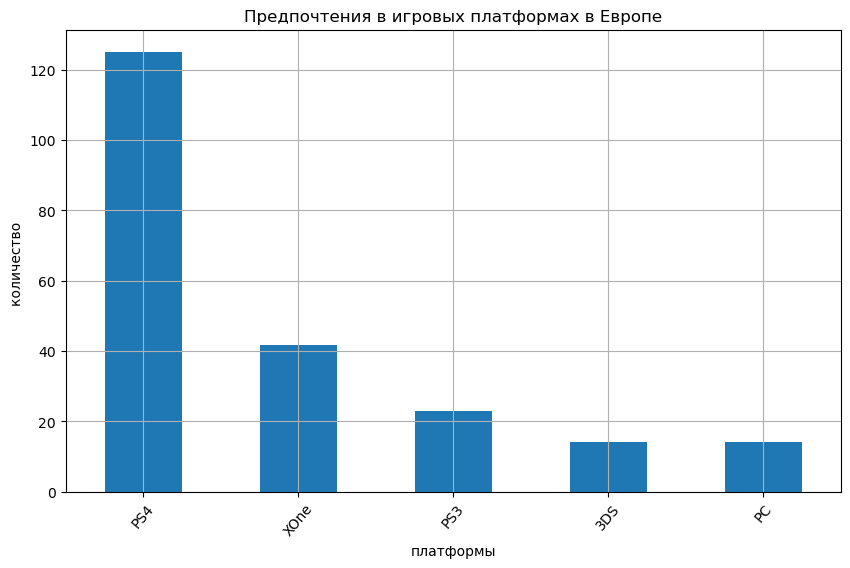

In [76]:
(EU.groupby('platform')['eu_sales'].sum().sort_values(ascending = False)
 .head().plot(kind = 'bar', grid = True, figsize = (10,6)))
plt.xticks(rotation = 50)
plt.title('Предпочтения в игровых платформах в Европе')
plt.xlabel('платформы')
plt.ylabel('количество ')

plt.show()

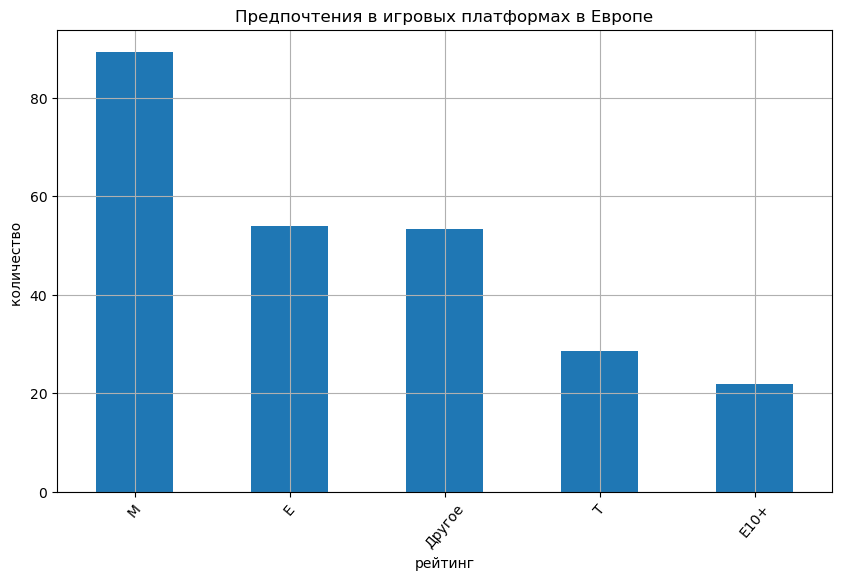

In [77]:
(EU.groupby('rating')['eu_sales'].sum().sort_values(ascending = False)
 .head().plot(kind = 'bar', grid = True, figsize = (10,6)))
plt.xticks(rotation = 50)
plt.title('Предпочтения в игровых платформах в Европе')
plt.xlabel('рейтинг')
plt.ylabel('количество ')

plt.show()

В Европе чаще предпочитают поиграть в игры жанров Action и Shooter'ы, на третьем месте Sports, далее Role-playing, на пятом месте Racing. Предпочтения практически дублируют жанровые изыски из Северной Америки

В качестве игровой платформы предпочитают PS4 и Xbox one. Далее PC, WiiU и 3DS.

Рейтинги предпочитают: M, E, "Другое", T, E10+

### Портрет пользователя из Японии

In [78]:
JP = actual.query('jp_sales > 0.1')[['platform', 'year_of_release', 'genre', 'rating', 'jp_sales']].copy()
JP.head()

,platform,year_of_release,genre,rating,jp_sales
31,PS4,2015,Shooter,Другое,0.36
42,PS4,2014,Action,M,0.38
47,3DS,2014,Role-Playing,Другое,3.10
87,PS4,2015,Shooter,Другое,0.22
92,PS4,2014,Shooter,M,0.14


In [79]:
print('Япония')
print('')
print('Жанровые предпочтения')
print(JP.groupby('genre')['jp_sales'].count().sort_values(ascending = False))
print('')
print('Предпочтения в игровых платформах')
print(JP.groupby('platform')['jp_sales'].count().sort_values(ascending = False))
print('')
print('Предпочтения в рейтингах игр')
print(JP.groupby('rating')['jp_sales'].count().sort_values(ascending = False))

Япония

Жанровые предпочтения
genre
Action          68
Role-Playing    52
Misc            15
Sports          15
Shooter         14
Fighting        12
Platform         6
Adventure        4
Puzzle           4
Simulation       3
Racing           1
Strategy         1
Name: jp_sales, dtype: int64

Предпочтения в игровых платформах
platform
3DS     68
PS4     40
PS3     38
PSV     33
WiiU    16
Name: jp_sales, dtype: int64

Предпочтения в рейтингах игр
rating
Другое    103
T          39
M          24
E          21
E10+        8
Name: jp_sales, dtype: int64


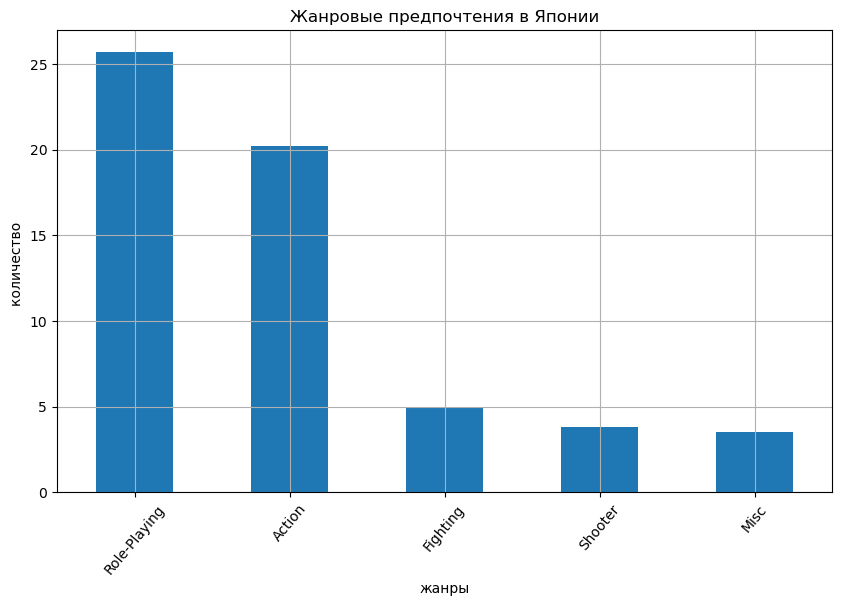

In [80]:
(JP.groupby('genre')['jp_sales'].sum().sort_values(ascending = False)
 .head().plot(kind = 'bar', grid = True, figsize = (10,6)))
plt.xticks(rotation = 50)
plt.title('Жанровые предпочтения в Японии')
plt.xlabel('жанры')
plt.ylabel('количество ')


plt.show()

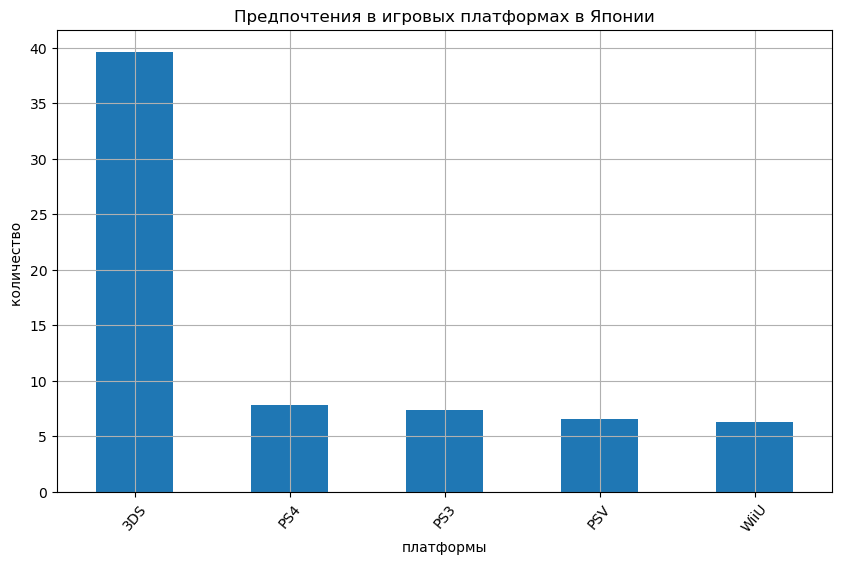

In [81]:
(JP.groupby('platform')['jp_sales'].sum().sort_values(ascending = False)
 .head().plot(kind = 'bar', grid = True, figsize = (10,6)))
plt.xticks(rotation = 50)
plt.title('Предпочтения в игровых платформах в Японии')
plt.xlabel('платформы')
plt.ylabel('количество ')

plt.show()

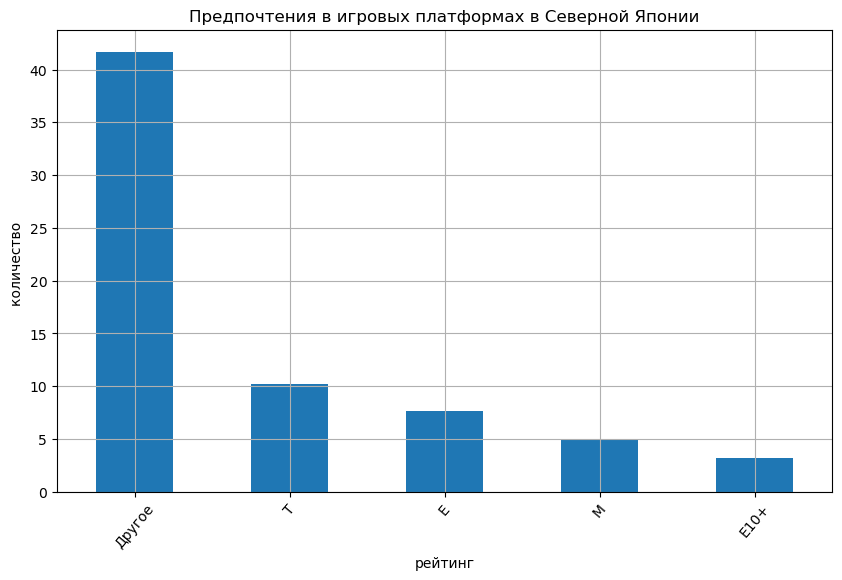

In [82]:
(JP.groupby('rating')['jp_sales'].sum().sort_values(ascending = False)
 .head().plot(kind = 'bar', grid = True, figsize = (10,6)))
plt.xticks(rotation = 50)
plt.title('Предпочтения в игровых платформах в Северной Японии')
plt.xlabel('рейтинг')
plt.ylabel('количество ')

plt.show()

Интереснее дела обстоят в Японии, где первое место в жанровой гонке занимает Role-Playing, а уже затем Action и с отрывом Shooter. На четвёртом месте Platform, затем Simulator. 

В качестве игровых платформ у японцев, что не удивительно, преобладают продукты японских же брендов: Sony и Nintendo, а именно 3DS, WiiU, Ps4, PSV, PS3.

Рейтинг самых популярных игр "Другое", E, T, M, E10+. Предпочтения в игровых рейтингах практически не меняются между пользователями из разных полушарий

## Проверка гипотез

- *Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;*

- *Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.*


### Средние пользовательские рейтинги платформ Xbox One и PC.

Гипотеза двухсторонняя:

H0 = средние пользовательские рейтинги платформ Xbox One и PC не отличаются друг от друга т.е. равны

Н1 = средние пользовательские рейтинги платформ Xbox One и PC отличаются друг от друга

In [83]:
# возвращаемся к пропускам в столбцах user_score. для подсчета статистика пропуски не годятся

actual['user_score'].isna().sum()

801

In [84]:
# создаю отфильтрованные датафреймы без пропусков

PC = actual[actual['platform'] == 'PC']['user_score'].copy()
XOne = actual[actual['platform'] == 'XOne']['user_score'].copy()

In [85]:
PC.value_counts().head()

7.1    7
6.8    6
7.3    6
6.9    5
5.9    5
Name: user_score, dtype: int64

In [86]:
XOne.value_counts().head()

7.1    7
6.8    6
7.5    6
8.0    6
7.2    6
Name: user_score, dtype: int64

<Axes: >

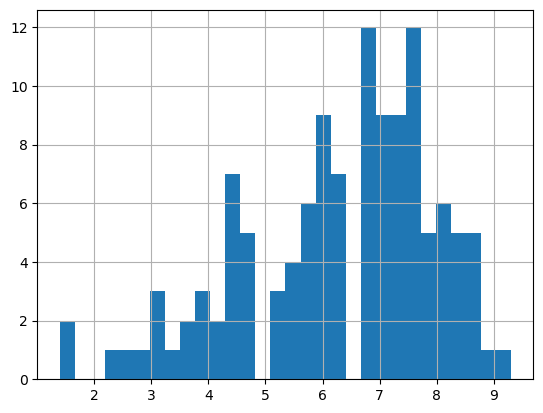

In [87]:
PC.hist(bins = 30)

<Axes: >

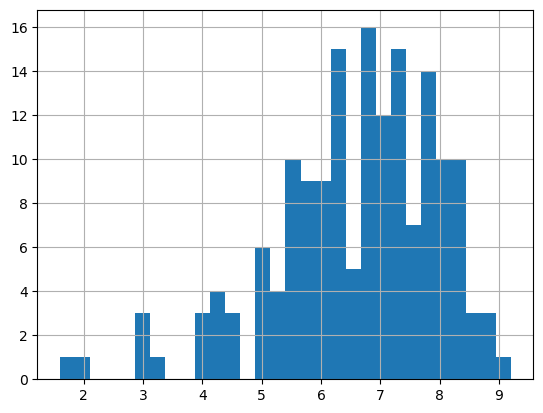

In [88]:
XOne.hist(bins = 30)

In [89]:
# посмотрим, что из себя представляют выборки

print('PC')
print(PC.describe())
print('')
print('XOne')
print(XOne.describe())



PC
count    122.000000
mean       6.298361
std        1.703278
min        1.400000
25%        5.325000
50%        6.800000
75%        7.600000
max        9.300000
Name: user_score, dtype: float64

XOne
count    165.000000
mean       6.594545
std        1.375139
min        1.600000
25%        5.800000
50%        6.800000
75%        7.600000
max        9.200000
Name: user_score, dtype: float64


На первый взгляд средние отличаются, но не так сильно, посмотрим, что скажет нам ттест. Сразу бросается в глаза разница в объёме выборок. У РС в несколько раз больше строк

In [90]:
alpha = 0.05
result_score_platform = st.ttest_ind(PC, XOne, equal_var = False, nan_policy = 'omit')
                            
print(f'p-value: {result_score_platform.pvalue}')

if (result_score_platform.pvalue < alpha):
    print('Отвергаем нулевую гипотезу')
else:
    print('Не отвергаем')

p-value: 0.11601398086668943
Не отвергаем


По итогу ттеста выясняем, что пользовательский рейтинг игр между платформами PC и Xbox One не имеет статистически значимых различий




In [91]:
# U критерий Манна-Уитни

alpha = 0.05
result_score_platform_mw = st.mannwhitneyu(PC, XOne, nan_policy = 'omit')
                            
print(f'p-value: {result_score_platform_mw.pvalue}')

if (result_score_platform_mw.pvalue < alpha):
    print('Отвергаем нулевую гипотезу')
else:
    print('Не отвергаем')

p-value: 0.27752869727762175
Не отвергаем


Мне кажется, что в условиях сравнения выборок, распределение которых во вском случае визуально отличается от нормального предпочтительнее применить U-критерий Манна-Уитни, а не ттест. Однако результат получаем тот же. Средние двух выборок не равны, отличия есть

### Средние пользовательские рейтинги жанров Action и Sports.

Гипотеза двухсторонняя:

H0 = средние пользовательские рейтинги жанров Action и Sports не отличаются друг от друга т.е. равны

Н1 = средние пользовательские рейтинги жанров Action и Sports отличаются друг от друга

In [92]:
# формирую два датафрейма с необходимыми данными

action = actual[actual['genre'] == 'Action']['user_score'].copy()
sports = actual[actual['genre'] == 'Sports']['user_score'].copy()

In [93]:
# здесь и далее повторяю операции, которые проводил выше

action.value_counts().head(10)

6.8    19
7.1    17
7.6    16
7.8    13
7.7    12
7.9    12
7.3    10
6.6    10
7.0    10
7.4     9
Name: user_score, dtype: int64

In [94]:
sports.value_counts().head(10)

4.3    5
3.1    5
6.1    5
5.5    4
5.1    4
6.0    4
6.8    4
6.3    4
7.0    4
6.2    4
Name: user_score, dtype: int64

<Axes: >

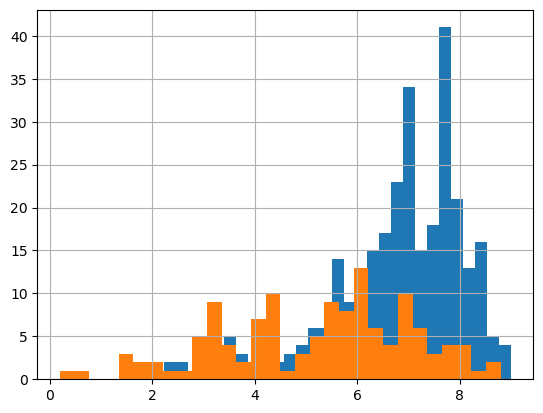

In [95]:
action.hist(bins = 30)
sports.hist(bins = 30)

распредление так же нельзя назвать нормальным. сильный перекос в правую сторону

In [96]:
print('action')
print(action.describe())
print('')
print('sports')
print(sports.describe())


action
count    297.000000
mean       6.760606
std        1.377852
min        2.000000
25%        6.100000
50%        7.100000
75%        7.700000
max        9.000000
Name: user_score, dtype: float64

sports
count    127.000000
mean       5.225197
std        1.856604
min        0.200000
25%        4.000000
50%        5.500000
75%        6.650000
max        8.800000
Name: user_score, dtype: float64


на первый взгляд средние уже сильно отличаются

In [97]:
alpha = 0.05

result_score_genre = st.ttest_ind(action, sports, equal_var = False, nan_policy = 'omit')
                            

print(f'p-value: {result_score_genre.pvalue}')

if (result_score_genre.pvalue < alpha):
    print('Отвергаем нулевую гипотезу')
else:
    print('Не отвергаем')

p-value: 1.182555038264477e-14
Отвергаем нулевую гипотезу


Обнаружены статистически значимые различия в двух выборках. Следовательно пользовательские рейтинги жанров Action и Sports не равны. У жанра Action средний рейтинг 6.8, а у жанра Sports средний рейтинг 5.7

In [98]:
alpha = 0.05

result_score_genre_mw = st.mannwhitneyu(action, sports, nan_policy = 'omit')
                            

print(f'p-value: {result_score_genre_mw.pvalue}')

if (result_score_genre_mw.pvalue < alpha):
    print('Отвергаем нулевую гипотезу')
else:
    print('Не отвергаем')

p-value: 1.2166879280294303e-16
Отвергаем нулевую гипотезу


В случае использования U-критерия Манна-Уитни результат получился тот же, что и при использовании ттеста.

Во всех случаях применял ттест Стьюдента для сравнения двух выборок т.к в задании необходимо было сравнить две **независимые** друг от друга выборки. Однако учитывая распределение, возможно, стоит отдать предпочтение U-критерию Манна-Уитни

## Вывод

- В самом начале были предобработаны, а именно: названия столбцов приведены к нижнему регистру, пропуски в столбце года выхода игр были заменены на медианные значения в зависимости от платформы, на которой выходила игра, изменены форматы данных, а также значение "tbd" в столбце с пользовательским рейтингом игр было заменено на 0


- **Определены самые популярные игровые платформы на момент до 2016 года: PS, Xbox 360, PS3, Wii, Nintendo DS, PS.** 


- Определены сроки, за которые консоли устаревают. **Время жизни консолей составляет прмиерно 11 лет.** 


- Выявлен актуальный период для прогноза на 2017 год. Выбраны наиболее перспективные платформы: PS4 и Xbox One. Суммарные продажи игр для этих консолей за 2014 - 2016 годы почти втрое предвышают своих предшественников. 


- Обнаружены самые популярные игры для каждой консоли. Также интересно отметить, что для каждой консоли есть игры, которые на порядок лучше продаются, чем остальные игры. Для высокопроизводительных и относительно современных консолей (PS3, PS4, X360, XOne, PS2) в числе самых поплярных игр находятся разные части игр серии GTA, а также разные части серии игр Call of Duty. Для Wii самыми популярными играми оказались Wii Sports и Mario Kart Wii. Для PS - Final Fantasy iX.


- **Не обнаружено корреляций между отзывами критиков и продажами, равно как и между отзывами пользователей и продажами.** Однако между отзывами критиков и пользователей есть некоторое сходство.


- Составлен список самых поплярных жанров за актуальный период 2014 - 2016: Shooter, Sports, Misc, далее примерно одинаково распространены Action, Role-playing, Platform и Fighting. Подобные списки, вместе с портретами пользователей, составлены и для пользователей из разных регионов.


    - Так для пользователей из Северной Америки любимыми жанрами являются Shooter и Action, на третьем месте Sports, далее Role-playing, на пятом месте Racing. Наиболее распространённые платформы для игр: PS4 и Xbox one, Wii, 3DS, PC. По рейтингу игр: М т.е. для лиц старше 17 лет. Далее "Другое", E, Т, Е10+.

    - Для пользователей из Европы результат схож с предыдущим. Пользователи чаще чаще предпочитают поиграть в игры жанра Action, Shoter, Sports, Role-playing, Racing. Наиболее популярны платформы: PS4 и Xbox one. Далее PC, WiiU и 3DS. Рейтинги повторяют картину из США: M, E, "Другое", T, E10+.

    - Пользователи из Японии предпочитают игры жанрах: Role-Playing, Action, Shooter, Platformer, Simulator. Наиболее распространённые платформы: 3DS, WiiU, Ps4, PSV, PS3. Рейтинги те же, что и в остальных регионах, но в другом порядке: "Другое", E, T, M, E10+. Получается, что в Японии пользователи отдают предпочтение японским игровым платформам, а пристрастия в жанрах игр отличаются от другой части света.


- По итогу проверки гипотез выяснено, что за актуальный период **средние пользовательские рейтинги платформ Xbox One и PC не отличаются друг от друга.**


- Также в следствие статистической обработки данных выяснили, что **средние пользовательские рейтинги жанров Action и Sports отличаются друг от друга.** У жанра Action средний рейтинг 6.8, а у жанра Sports средний рейтинг 5.7

В качестве рекомендаций могу предложить отделу маркетинга опираться в рекламной кампании для каждого региона на представленные самые популярные жанры, а также для консолей нового поколения, игры для которых в значительной мере лучше продаются относительно прошлых поколений. Также стоит отдавать предпочтению в рекламе экшнам. Как мы выяснили после статистического теста, пользователи оценивают экшн игры несколько выше. Однако оба этих жанра и так входят в пятерку самых поплярных. 